# Análisis de Marketing para Showz
## Optimización de gastos de marketing mediante análisis de métricas clave

**Proyecto:** Sprint 9 - Análisis de Negocio  
**Empresa:** Showz (venta de entradas de eventos)  
**Período:** Junio 2017 - Diciembre 2018  
**Volumen de datos:** 359,400 visitas | 50,415 pedidos | 2,542 registros de costos


---

### Descripción del proyecto
Este análisis tiene como objetivo optimizar los gastos de marketing de Showz mediante el estudio de:
- **Comportamiento de usuarios** y patrones de uso del servicio
- **Tiempo hasta conversión** de visitantes a clientes
- **Valor de vida del cliente (LTV)** por diferentes segmentos
- **Costo de adquisición de clientes (CAC)** y retorno de inversión (ROMI) por canal

**Estructura de los datos:**
- **visits_log_us.csv:** Registros de sesiones con Device, timestamps, Source Id y Uid
- **orders_log_us.csv:** Pedidos con timestamp de compra, Revenue y Uid
- **costs_us.csv:** Gastos diarios por fuente de marketing (source_id, dt, costs)

---


## Paso 1: Acceso y preparación de datos

### 1.1 Importar librerías necesarias

In [1]:
#importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:

# Configuración de visualización
try:
    # Intentar usar seaborn para el estilo
    sns.set_style("whitegrid")
    sns.set_palette("Set2")
except:
    # Si falla, usar configuración básica
    pass

# Configuración manual que siempre funciona
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

print("✅ Librerías importadas correctamente")
print("🎯 Iniciando análisis de marketing para Showz")

✅ Librerías importadas correctamente
🎯 Iniciando análisis de marketing para Showz


### 1.2 Cargar los datasets reales

In [3]:
# Cargar los datasets
print("📂 Cargando datasets...")

visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

print("📊 Datasets cargados exitosamente:")
print(f"• Visitas: {visits.shape[0]:,} registros, {visits.shape[1]} columnas")
print(f"• Pedidos: {orders.shape[0]:,} registros, {orders.shape[1]} columnas")
print(f"• Costos: {costs.shape[0]:,} registros, {costs.shape[1]} columnas")
print()
print("📅 Período de análisis:")
print(f"• Desde: Junio 2017")
print(f"• Hasta: Diciembre 2018")
print(f"• Total: ~19 meses de datos")

📂 Cargando datasets...
📊 Datasets cargados exitosamente:
• Visitas: 359,400 registros, 5 columnas
• Pedidos: 50,415 registros, 3 columnas
• Costos: 2,542 registros, 3 columnas

📅 Período de análisis:
• Desde: Junio 2017
• Hasta: Diciembre 2018
• Total: ~19 meses de datos


### 1.3 Exploración inicial de datos

**Dataset de Visitas:**

In [4]:
print("🔍 === EXPLORACIÓN: DATASET VISITS ===")
print("Estructura del dataset:")
display(visits.head())
print(f"\nInformación técnica:")
visits.info()

print(f"\n📊 Estadísticas descriptivas:")
print(f"• Usuarios únicos: {visits['Uid'].nunique():,}")
print(f"• Dispositivos: {visits['Device'].unique()}")
print(f"• Fuentes de tráfico: {visits['Source Id'].nunique()} diferentes")
print(f"• Rango de Source Id: {visits['Source Id'].min()} - {visits['Source Id'].max()}")


🔍 === EXPLORACIÓN: DATASET VISITS ===
Estructura del dataset:


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168



Información técnica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

📊 Estadísticas descriptivas:
• Usuarios únicos: 228,169
• Dispositivos: ['touch' 'desktop']
• Fuentes de tráfico: 9 diferentes
• Rango de Source Id: 1 - 10


# Distribución por dispositivo

In [5]:
device_dist = visits['Device'].value_counts()
print(f"\n📱 Distribución por dispositivo:")
for device, count in device_dist.items():
    percentage = count / len(visits) * 100
    print(f"• {device}: {count:,} visitas ({percentage:.1f}%)")


📱 Distribución por dispositivo:
• desktop: 262,567 visitas (73.1%)
• touch: 96,833 visitas (26.9%)


**Dataset de Pedidos:**

In [6]:
print("\n💰 === EXPLORACIÓN: DATASET ORDERS ===")
print("Estructura del dataset:")
display(orders.head())
print(f"\nInformación técnica:")
orders.info()

print(f"\n📈 Estadísticas de Revenue:")
display(orders['Revenue'].describe())

print(f"\n💵 Análisis de ingresos:")
print(f"• Usuarios compradores: {orders['Uid'].nunique():,}")
print(f"• Ingreso total: ${orders['Revenue'].sum():,.2f}")
print(f"• Ingreso promedio por pedido: ${orders['Revenue'].mean():.2f}")
print(f"• Ingreso mediano: ${orders['Revenue'].median():.2f}")
print(f"• Pedido mínimo: ${orders['Revenue'].min():.2f}")
print(f"• Pedido máximo: ${orders['Revenue'].max():.2f}")


💰 === EXPLORACIÓN: DATASET ORDERS ===
Estructura del dataset:


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450



Información técnica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

📈 Estadísticas de Revenue:


count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: Revenue, dtype: float64


💵 Análisis de ingresos:
• Usuarios compradores: 36,523
• Ingreso total: $252,057.20
• Ingreso promedio por pedido: $5.00
• Ingreso mediano: $2.50
• Pedido mínimo: $0.00
• Pedido máximo: $2633.28


# Detectar valores extremos

In [7]:
q95 = orders['Revenue'].quantile(0.95)
q99 = orders['Revenue'].quantile(0.99)
print(f"• 95% de pedidos ≤ ${q95:.2f}")
print(f"• 99% de pedidos ≤ ${q99:.2f}")

• 95% de pedidos ≤ $13.75
• 99% de pedidos ≤ $36.67


**Dataset de Costos:**

In [8]:
print("\n💸 === EXPLORACIÓN: DATASET COSTS ===")
print("Estructura del dataset:")
display(costs.head())
print(f"\nInformación técnica:")
costs.info()

print(f"\n📊 Estadísticas de costos:")
display(costs['costs'].describe())

print(f"\n💰 Análisis de gastos de marketing:")
print(f"• Fuentes de marketing: {costs['source_id'].nunique()} diferentes")
print(f"• Gasto total: ${costs['costs'].sum():,.2f}")
print(f"• Gasto promedio diario: ${costs['costs'].mean():.2f}")
print(f"• Días con gastos registrados: {len(costs)}")


💸 === EXPLORACIÓN: DATASET COSTS ===
Estructura del dataset:


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08



Información técnica:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

📊 Estadísticas de costos:


count    2542.000000
mean      129.477427
std       156.296628
min         0.540000
25%        21.945000
50%        77.295000
75%       170.065000
max      1788.280000
Name: costs, dtype: float64


💰 Análisis de gastos de marketing:
• Fuentes de marketing: 7 diferentes
• Gasto total: $329,131.62
• Gasto promedio diario: $129.48
• Días con gastos registrados: 2542


# Análisis por fuente

In [9]:
source_spending = costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print(f"\n🎯 Top 5 fuentes por gasto total:")
for source_id, total_cost in source_spending.head().items():
    percentage = total_cost / costs['costs'].sum() * 100
    print(f"• Fuente {source_id}: ${total_cost:,.2f} ({percentage:.1f}%)")


🎯 Top 5 fuentes por gasto total:
• Fuente 3: $141,321.63 (42.9%)
• Fuente 4: $61,073.60 (18.6%)
• Fuente 5: $51,757.10 (15.7%)
• Fuente 2: $42,806.04 (13.0%)
• Fuente 1: $20,833.27 (6.3%)


### 1.4 Limpieza y optimización de datos

In [10]:
print("🔧 === LIMPIEZA Y OPTIMIZACIÓN DE DATOS ===")

# Verificar datos faltantes ANTES de limpieza
print("📋 Datos faltantes antes de limpieza:")
print("• Visits:", visits.isnull().sum().sum(), "valores faltantes")
print("• Orders:", orders.isnull().sum().sum(), "valores faltantes")
print("• Costs:", costs.isnull().sum().sum(), "valores faltantes")

# Convertir tipos de datos apropiados
print("\n⚙️ Convirtiendo tipos de datos...")

🔧 === LIMPIEZA Y OPTIMIZACIÓN DE DATOS ===
📋 Datos faltantes antes de limpieza:
• Visits: 0 valores faltantes
• Orders: 0 valores faltantes
• Costs: 0 valores faltantes

⚙️ Convirtiendo tipos de datos...


In [11]:
# Convertir Uid a string para mejor manejo (son IDs, no números para cálculos)
visits['Uid'] = visits['Uid'].astype(str)
orders['Uid'] = orders['Uid'].astype(str)

# Convertir fechas
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

print("✅ Conversiones de tipo completadas")

✅ Conversiones de tipo completadas


In [12]:
# Crear columnas derivadas útiles
print("🛠️ Creando columnas derivadas...")

🛠️ Creando columnas derivadas...


In [13]:
# Para visits
visits['session_duration'] = (visits['End Ts'] - visits['Start Ts']).dt.total_seconds() / 60  # minutos
visits['date'] = visits['Start Ts'].dt.date
visits['week'] = visits['Start Ts'].dt.to_period('W')
visits['month'] = visits['Start Ts'].dt.to_period('M')
visits['hour'] = visits['Start Ts'].dt.hour
visits['day_of_week'] = visits['Start Ts'].dt.day_name()

# Para orders
orders['date'] = orders['Buy Ts'].dt.date
orders['month'] = orders['Buy Ts'].dt.to_period('M')
orders['hour'] = orders['Buy Ts'].dt.hour
orders['day_of_week'] = orders['Buy Ts'].dt.day_name()

# Para costs
costs['month'] = costs['dt'].dt.to_period('M')
costs['day_of_week'] = costs['dt'].dt.day_name()

print("✅ Columnas derivadas creadas")
print(f"• Duración promedio de sesión: {visits['session_duration'].mean():.2f} minutos")
print(f"• Duración mediana de sesión: {visits['session_duration'].median():.2f} minutos")

✅ Columnas derivadas creadas
• Duración promedio de sesión: 10.72 minutos
• Duración mediana de sesión: 5.00 minutos


In [14]:
# Filtrar datos inconsistentes y outliers
print("\n🧹 Filtrando datos inconsistentes...")

print("Registros ANTES de limpieza:")
print(f"• Visitas: {len(visits):,}")
print(f"• Pedidos: {len(orders):,}")
print(f"• Costos: {len(costs):,}")


🧹 Filtrando datos inconsistentes...
Registros ANTES de limpieza:
• Visitas: 359,400
• Pedidos: 50,415
• Costos: 2,542


In [15]:
# Filtrar sesiones con duración válida
valid_sessions_mask = (visits['session_duration'] >= 0) & (visits['session_duration'] <= 1440)  # máximo 24 horas
visits_clean = visits[valid_sessions_mask].copy()

# Filtrar pedidos con ingresos positivos
orders_clean = orders[orders['Revenue'] > 0].copy()

# Filtrar costos no negativos
costs_clean = costs[costs['costs'] >= 0].copy()

print("\nRegistros DESPUÉS de limpieza:")
print(f"• Visitas: {len(visits_clean):,} (-{len(visits) - len(visits_clean):,})")
print(f"• Pedidos: {len(orders_clean):,} (-{len(orders) - len(orders_clean):,})")
print(f"• Costos: {len(costs_clean):,} (-{len(costs) - len(costs_clean):,})")


Registros DESPUÉS de limpieza:
• Visitas: 359,398 (-2)
• Pedidos: 50,364 (-51)
• Costos: 2,542 (-0)


In [16]:
# Usar datasets limpios para el resto del análisis
visits = visits_clean
orders = orders_clean
costs = costs_clean

print("✅ Limpieza completada - Datasets listos para análisis")

✅ Limpieza completada - Datasets listos para análisis


## Paso 2: Análisis de métricas

### 2.1 Análisis de Visitas

#### ¿Cuántas personas usan el servicio cada día, semana y mes?


# Análisis por día

In [17]:
print("📊 === ANÁLISIS DE VISITAS ===")

# Usuarios únicos por día
daily_users = visits.groupby('date')['Uid'].nunique().reset_index()
daily_users.columns = ['date', 'unique_users']

# Sesiones por día
daily_sessions = visits.groupby('date').size().reset_index(name='sessions')

# Combinar métricas diarias
daily_metrics = daily_users.merge(daily_sessions, on='date')
daily_metrics['sessions_per_user'] = daily_metrics['sessions'] / daily_metrics['unique_users']

print("📈 MÉTRICAS DIARIAS:")
print(f"• Promedio de usuarios únicos por día: {daily_metrics['unique_users'].mean():.0f}")
print(f"• Mediana de usuarios únicos por día: {daily_metrics['unique_users'].median():.0f}")
print(f"• Día con más usuarios: {daily_metrics['unique_users'].max():,}")
print(f"• Día con menos usuarios: {daily_metrics['unique_users'].min():,}")

print(f"\n• Promedio de sesiones por día: {daily_metrics['sessions'].mean():.0f}")
print(f"• Promedio de sesiones por usuario: {daily_metrics['sessions_per_user'].mean():.2f}")

📊 === ANÁLISIS DE VISITAS ===
📈 MÉTRICAS DIARIAS:
• Promedio de usuarios únicos por día: 908
• Mediana de usuarios únicos por día: 921
• Día con más usuarios: 3,319
• Día con menos usuarios: 1

• Promedio de sesiones por día: 987
• Promedio de sesiones por usuario: 1.08


# Análisis semanal

In [18]:
weekly_users = visits.groupby('week')['Uid'].nunique()
weekly_sessions = visits.groupby('week').size()

print(f"\n📅 MÉTRICAS SEMANALES:")
print(f"• Promedio de usuarios únicos por semana: {weekly_users.mean():.0f}")
print(f"• Promedio de sesiones por semana: {weekly_sessions.mean():.0f}")
print(f"• Semana con más usuarios: {weekly_users.max():,}")
print(f"• Semana con menos usuarios: {weekly_users.min():,}")


📅 MÉTRICAS SEMANALES:
• Promedio de usuarios únicos por semana: 5716
• Promedio de sesiones por semana: 6781
• Semana con más usuarios: 10,586
• Semana con menos usuarios: 2,021


# Análisis mensual

In [19]:
monthly_users = visits.groupby('month')['Uid'].nunique()
monthly_sessions = visits.groupby('month').size()

print(f"\n📆 MÉTRICAS MENSUALES:")
print(f"• Promedio de usuarios únicos por mes: {monthly_users.mean():.0f}")
print(f"• Promedio de sesiones por mes: {monthly_sessions.mean():.0f}")
print(f"• Mes con más usuarios: {monthly_users.max():,}")
print(f"• Mes con menos usuarios: {monthly_users.min():,}")


📆 MÉTRICAS MENSUALES:
• Promedio de usuarios únicos por mes: 23228
• Promedio de sesiones por mes: 29950
• Mes con más usuarios: 32,797
• Mes con menos usuarios: 11,631


# Mostrar tendencia mensual

In [20]:
print(f"\n📈 EVOLUCIÓN MENSUAL DE USUARIOS (últimos 6 meses):")
for month, users in monthly_users.tail(6).items():
    sessions = monthly_sessions[month]
    avg_sessions = sessions / users
    print(f"• {month}: {users:,} usuarios | {sessions:,} sesiones | {avg_sessions:.2f} ses/usuario")


📈 EVOLUCIÓN MENSUAL DE USUARIOS (últimos 6 meses):
• 2017-12: 31,557 usuarios | 41,983 sesiones | 1.33 ses/usuario
• 2018-01: 28,716 usuarios | 36,939 sesiones | 1.29 ses/usuario
• 2018-02: 28,749 usuarios | 37,182 sesiones | 1.29 ses/usuario
• 2018-03: 27,473 usuarios | 35,677 sesiones | 1.30 ses/usuario
• 2018-04: 21,008 usuarios | 26,515 sesiones | 1.26 ses/usuario
• 2018-05: 20,701 usuarios | 26,635 sesiones | 1.29 ses/usuario


#### ¿Cuántas sesiones hay por día? + Duración de sesiones

In [21]:
print("\n⏱️ === ANÁLISIS DE SESIONES ===")

# Estadísticas de duración
print("📊 DURACIÓN DE SESIONES:")
print(f"• Duración promedio: {visits['session_duration'].mean():.2f} minutos")
print(f"• Duración mediana: {visits['session_duration'].median():.2f} minutos")
print(f"• Duración mínima: {visits['session_duration'].min():.2f} minutos")
print(f"• Duración máxima: {visits['session_duration'].max():.2f} minutos")

# Percentiles importantes
percentiles = [25, 50, 75, 90, 95, 99]
print(f"\n📈 Distribución de duración (percentiles):")
for p in percentiles:
    duration = visits['session_duration'].quantile(p/100)
    print(f"• P{p}: {duration:.2f} minutos")

# Categorización de sesiones por duración
def categorize_session_duration(minutes):
    if minutes < 1:
        return 'Muy corta (<1 min)'
    elif minutes < 5:
        return 'Corta (1-5 min)'
    elif minutes < 15:
        return 'Media (5-15 min)'
    elif minutes < 60:
        return 'Larga (15-60 min)'
    else:
        return 'Muy larga (>60 min)'

visits['duration_category'] = visits['session_duration'].apply(categorize_session_duration)
duration_dist = visits['duration_category'].value_counts()

print(f"\n🕐 DISTRIBUCIÓN POR DURACIÓN:")
for category, count in duration_dist.items():
    percentage = count / len(visits) * 100
    print(f"• {category}: {count:,} sesiones ({percentage:.1f}%)")


⏱️ === ANÁLISIS DE SESIONES ===
📊 DURACIÓN DE SESIONES:
• Duración promedio: 10.72 minutos
• Duración mediana: 5.00 minutos
• Duración mínima: 0.00 minutos
• Duración máxima: 711.00 minutos

📈 Distribución de duración (percentiles):
• P25: 2.00 minutos
• P50: 5.00 minutos
• P75: 14.00 minutos
• P90: 27.00 minutos
• P95: 38.00 minutos
• P99: 75.00 minutos

🕐 DISTRIBUCIÓN POR DURACIÓN:
• Corta (1-5 min): 136,534 sesiones (38.0%)
• Media (5-15 min): 100,189 sesiones (27.9%)
• Larga (15-60 min): 79,450 sesiones (22.1%)
• Muy corta (<1 min): 36,662 sesiones (10.2%)
• Muy larga (>60 min): 6,563 sesiones (1.8%)


#### Análisis de patrones temporales

In [22]:
print("\n🕒 === ANÁLISIS DE PATRONES TEMPORALES ===")

# Análisis por día de la semana
day_activity = visits.groupby('day_of_week').agg({
    'Uid': 'nunique',
    'session_duration': 'mean'
}).reset_index()

# Ordenar días de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_activity['day_of_week'] = pd.Categorical(day_activity['day_of_week'], categories=day_order, ordered=True)
day_activity = day_activity.sort_values('day_of_week')

print("📅 ACTIVIDAD POR DÍA DE LA SEMANA:")
for _, row in day_activity.iterrows():
    print(f"• {row['day_of_week']}: {row['Uid']:,} usuarios únicos | {row['session_duration']:.1f} min promedio")

# Análisis por hora del día
hourly_activity = visits.groupby('hour').agg({
    'Uid': 'nunique',
    'session_duration': 'mean'
}).reset_index()

print(f"\n🕐 HORAS PICO (Top 5 por usuarios únicos):")
top_hours = hourly_activity.nlargest(5, 'Uid')
for _, row in top_hours.iterrows():
    # Convertir a int para evitar error de formato
    hour = int(row['hour'])
    users = int(row['Uid'])
    duration = row['session_duration']
    print(f"• {hour:02d}:00 - {users:,} usuarios únicos | {duration:.1f} min promedio")

print(f"\n🕐 HORAS DE MENOR ACTIVIDAD (Bottom 3):")
low_hours = hourly_activity.nsmallest(3, 'Uid')
for _, row in low_hours.iterrows():
    hour = int(row['hour'])
    users = int(row['Uid'])
    duration = row['session_duration']
    print(f"• {hour:02d}:00 - {users:,} usuarios únicos | {duration:.1f} min promedio")


🕒 === ANÁLISIS DE PATRONES TEMPORALES ===
📅 ACTIVIDAD POR DÍA DE LA SEMANA:
• Monday: 45,207 usuarios únicos | 10.8 min promedio
• Tuesday: 44,019 usuarios únicos | 10.9 min promedio
• Wednesday: 43,154 usuarios únicos | 10.8 min promedio
• Thursday: 47,190 usuarios únicos | 10.8 min promedio
• Friday: 44,200 usuarios únicos | 11.2 min promedio
• Saturday: 35,110 usuarios únicos | 10.1 min promedio
• Sunday: 34,418 usuarios únicos | 10.0 min promedio

🕐 HORAS PICO (Top 5 por usuarios únicos):
• 13:00 - 21,245 usuarios únicos | 11.5 min promedio
• 14:00 - 20,987 usuarios únicos | 11.4 min promedio
• 12:00 - 20,955 usuarios únicos | 11.5 min promedio
• 15:00 - 20,570 usuarios únicos | 11.4 min promedio
• 11:00 - 20,142 usuarios únicos | 11.9 min promedio

🕐 HORAS DE MENOR ACTIVIDAD (Bottom 3):
• 04:00 - 959 usuarios únicos | 8.3 min promedio
• 05:00 - 995 usuarios únicos | 8.4 min promedio
• 03:00 - 1,481 usuarios únicos | 8.5 min promedio


#### ¿Con qué frecuencia los usuarios regresan?

In [23]:
print("\n🔄 === ANÁLISIS DE RETORNO DE USUARIOS ===")

# Calcular métricas por usuario
user_sessions = visits.groupby('Uid').agg({
    'Start Ts': ['count', 'min', 'max'],
    'date': 'nunique',
    'session_duration': 'mean'
}).reset_index()

# Aplanar nombres de columnas
user_sessions.columns = ['Uid', 'total_sessions', 'first_visit', 'last_visit', 'days_active', 'avg_session_duration']

# Calcular período de actividad
user_sessions['activity_period'] = (user_sessions['last_visit'] - user_sessions['first_visit']).dt.days + 1
user_sessions['sessions_per_day'] = user_sessions['total_sessions'] / user_sessions['activity_period']

# Análisis de comportamiento de usuarios
single_session_users = len(user_sessions[user_sessions['total_sessions'] == 1])
multi_session_users = len(user_sessions[user_sessions['total_sessions'] > 1])
total_users = len(user_sessions)
returning_rate = multi_session_users / total_users * 100

print("👥 COMPORTAMIENTO DE USUARIOS:")
print(f"• Total de usuarios únicos: {total_users:,}")
print(f"• Usuarios con una sola sesión: {single_session_users:,} ({100-returning_rate:.1f}%)")
print(f"• Usuarios que regresan: {multi_session_users:,} ({returning_rate:.1f}%)")
print(f"• Promedio de sesiones por usuario: {user_sessions['total_sessions'].mean():.2f}")
print(f"• Promedio de días activos por usuario: {user_sessions['days_active'].mean():.2f}")

# Distribución detallada de sesiones por usuario
session_distribution = user_sessions['total_sessions'].value_counts().head(10).sort_index()
print(f"\n📊 DISTRIBUCIÓN DE SESIONES POR USUARIO:")
for sessions_count, user_count in session_distribution.items():
    percentage = user_count / total_users * 100
    print(f"• {sessions_count} sesión(es): {user_count:,} usuarios ({percentage:.1f}%)")

# Usuarios súper activos
super_active = len(user_sessions[user_sessions['total_sessions'] >= 10])
print(f"\n🔥 USUARIOS SÚPER ACTIVOS (≥10 sesiones): {super_active:,} ({super_active/total_users*100:.1f}%)")


🔄 === ANÁLISIS DE RETORNO DE USUARIOS ===
👥 COMPORTAMIENTO DE USUARIOS:
• Total de usuarios únicos: 228,169
• Usuarios con una sola sesión: 176,041 (77.2%)
• Usuarios que regresan: 52,128 (22.8%)
• Promedio de sesiones por usuario: 1.58
• Promedio de días activos por usuario: 1.45

📊 DISTRIBUCIÓN DE SESIONES POR USUARIO:
• 1 sesión(es): 176,041 usuarios (77.2%)
• 2 sesión(es): 30,926 usuarios (13.6%)
• 3 sesión(es): 10,184 usuarios (4.5%)
• 4 sesión(es): 4,358 usuarios (1.9%)
• 5 sesión(es): 2,282 usuarios (1.0%)
• 6 sesión(es): 1,243 usuarios (0.5%)
• 7 sesión(es): 807 usuarios (0.4%)
• 8 sesión(es): 513 usuarios (0.2%)
• 9 sesión(es): 356 usuarios (0.2%)
• 10 sesión(es): 239 usuarios (0.1%)

🔥 USUARIOS SÚPER ACTIVOS (≥10 sesiones): 1,459 (0.6%)


#### Visualizaciones de análisis de visitas

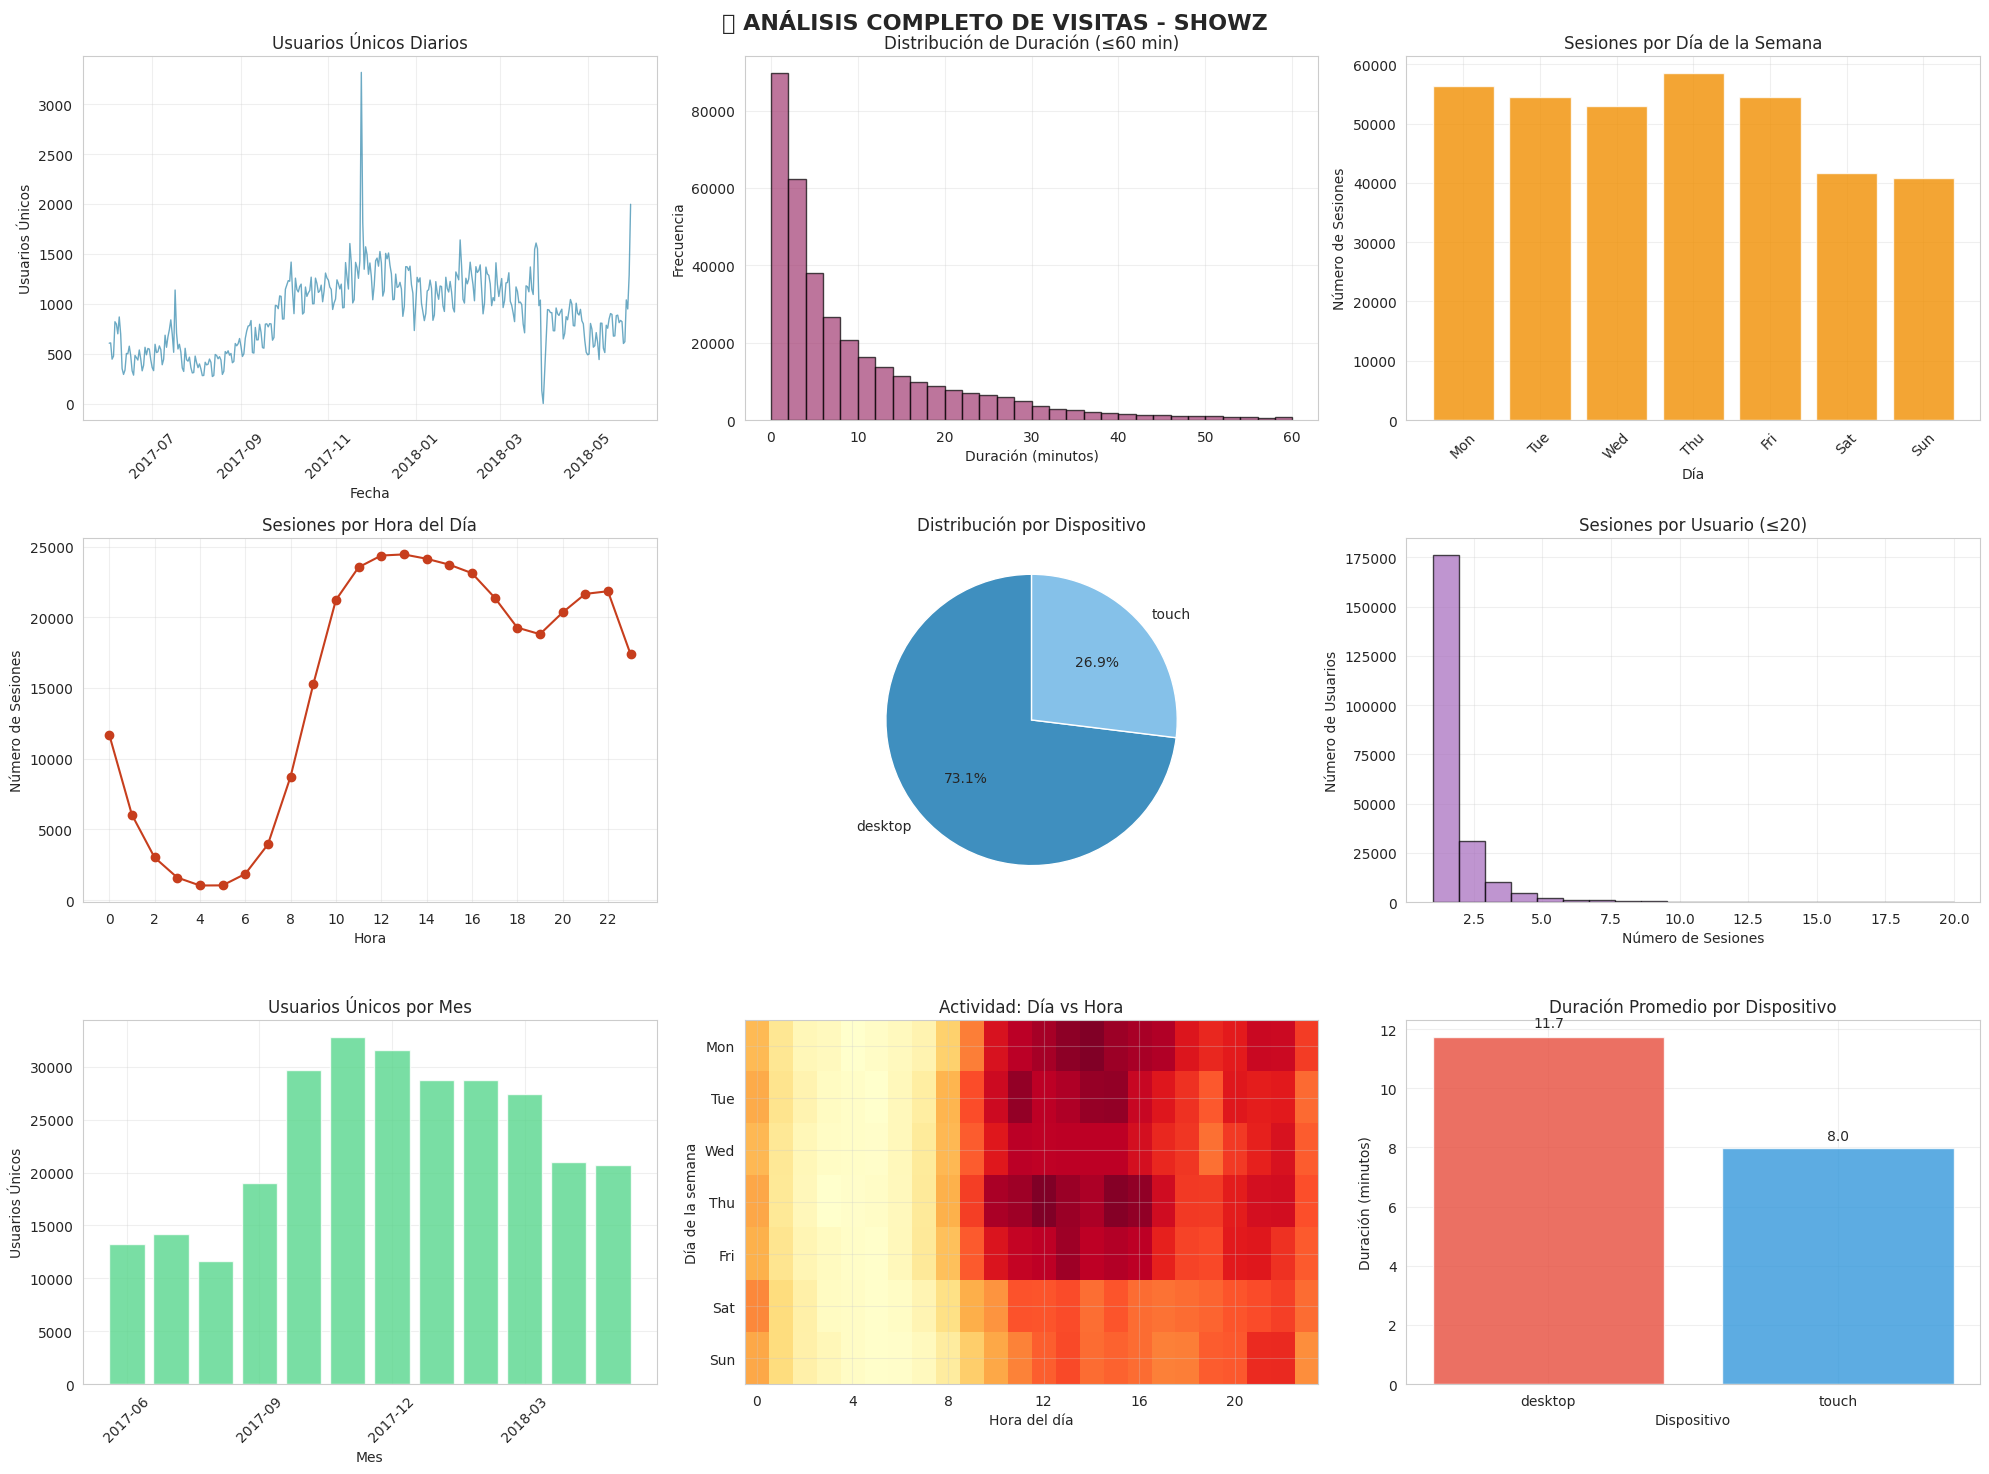

In [24]:
# Crear visualizaciones comprehensivas de visitas
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('📊 ANÁLISIS COMPLETO DE VISITAS - SHOWZ', fontsize=16, fontweight='bold')

# 1. Usuarios únicos por día (tendencia temporal)
axes[0, 0].plot(pd.to_datetime(daily_metrics['date']), daily_metrics['unique_users'], 
                alpha=0.7, color='#2E86AB', linewidth=1)
axes[0, 0].set_title('Usuarios Únicos Diarios')
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].set_ylabel('Usuarios Únicos')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Distribución de duración de sesiones
duration_filtered = visits[visits['session_duration'] <= 60]['session_duration']  # Filtrar para mejor visualización
axes[0, 1].hist(duration_filtered, bins=30, alpha=0.7, color='#A23B72', edgecolor='black')
axes[0, 1].set_title('Distribución de Duración (≤60 min)')
axes[0, 1].set_xlabel('Duración (minutos)')
axes[0, 1].set_ylabel('Frecuencia')

# 3. Actividad por día de la semana
day_counts = visits['day_of_week'].value_counts().reindex(day_order)
axes[0, 2].bar(range(len(day_order)), day_counts.values, alpha=0.8, color='#F18F01')
axes[0, 2].set_title('Sesiones por Día de la Semana')
axes[0, 2].set_xlabel('Día')
axes[0, 2].set_ylabel('Número de Sesiones')
axes[0, 2].set_xticks(range(len(day_order)))
axes[0, 2].set_xticklabels([d[:3] for d in day_order], rotation=45)

# 4. Actividad por hora del día
hourly_sessions = visits['hour'].value_counts().sort_index()
axes[1, 0].plot(hourly_sessions.index, hourly_sessions.values, marker='o', color='#C73E1D')
axes[1, 0].set_title('Sesiones por Hora del Día')
axes[1, 0].set_xlabel('Hora')
axes[1, 0].set_ylabel('Número de Sesiones')
axes[1, 0].set_xticks(range(0, 24, 2))

# 5. Distribución de dispositivos
device_counts = visits['Device'].value_counts()
colors = ['#3F8FBF', '#85C1E9']
axes[1, 1].pie(device_counts.values, labels=device_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=colors)
axes[1, 1].set_title('Distribución por Dispositivo')

# 6. Sesiones por usuario (distribución)
session_dist_plot = user_sessions[user_sessions['total_sessions'] <= 20]['total_sessions']
axes[1, 2].hist(session_dist_plot, bins=20, alpha=0.7, color='#A569BD', edgecolor='black')
axes[1, 2].set_title('Sesiones por Usuario (≤20)')
axes[1, 2].set_xlabel('Número de Sesiones')
axes[1, 2].set_ylabel('Número de Usuarios')

# 7. Evolución mensual de usuarios
monthly_data = monthly_users.reset_index()
monthly_data['month_str'] = monthly_data['month'].astype(str)
axes[2, 0].bar(range(len(monthly_data)), monthly_data['Uid'], alpha=0.8, color='#58D68D')
axes[2, 0].set_title('Usuarios Únicos por Mes')
axes[2, 0].set_xlabel('Mes')
axes[2, 0].set_ylabel('Usuarios Únicos')
axes[2, 0].set_xticks(range(0, len(monthly_data), 3))
axes[2, 0].set_xticklabels([monthly_data.iloc[i]['month_str'][:7] for i in range(0, len(monthly_data), 3)], rotation=45)

# 8. Heatmap de actividad (día de semana vs hora) - muestra representativa
sample_visits = visits.sample(50000)  # Muestra para rendimiento
pivot_activity = sample_visits.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
pivot_activity = pivot_activity.reindex(day_order)
im = axes[2, 1].imshow(pivot_activity.values, cmap='YlOrRd', aspect='auto')
axes[2, 1].set_title('Actividad: Día vs Hora')
axes[2, 1].set_xlabel('Hora del día')
axes[2, 1].set_ylabel('Día de la semana')
axes[2, 1].set_yticks(range(len(day_order)))
axes[2, 1].set_yticklabels([d[:3] for d in day_order])
axes[2, 1].set_xticks(range(0, 24, 4))

# 9. Duración promedio por dispositivo
device_duration = visits.groupby('Device')['session_duration'].mean()
axes[2, 2].bar(device_duration.index, device_duration.values, alpha=0.8, color=['#E74C3C', '#3498DB'])
axes[2, 2].set_title('Duración Promedio por Dispositivo')
axes[2, 2].set_xlabel('Dispositivo')
axes[2, 2].set_ylabel('Duración (minutos)')

# Añadir valores en las barras
for i, v in enumerate(device_duration.values):
    axes[2, 2].text(i, v + v*0.02, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 2.2 Análisis de Ventas

#### ¿Cuándo empieza la gente a comprar?

In [25]:
print("\n💰 === ANÁLISIS DE CONVERSIONES Y VENTAS ===")

# Combinar datos de primera visita con primera compra
first_visits = visits.groupby('Uid')['Start Ts'].min().reset_index()
first_visits.columns = ['Uid', 'first_visit']

first_orders = orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.columns = ['Uid', 'first_order']

# Análisis de conversión
user_conversion = first_visits.merge(first_orders, on='Uid', how='left')
user_conversion['days_to_conversion'] = (user_conversion['first_order'] - user_conversion['first_visit']).dt.days

# Métricas de conversión
total_users = len(user_conversion)
converted_users = len(user_conversion.dropna(subset=['first_order']))
conversion_rate = converted_users / total_users * 100

print(f"🎯 MÉTRICAS DE CONVERSIÓN GLOBAL:")
print(f"• Total de usuarios únicos: {total_users:,}")
print(f"• Usuarios que compraron al menos una vez: {converted_users:,}")
print(f"• Tasa de conversión global: {conversion_rate:.2f}%")
print(f"• Usuarios que NO compraron: {total_users - converted_users:,} ({100-conversion_rate:.2f}%)")


💰 === ANÁLISIS DE CONVERSIONES Y VENTAS ===
🎯 MÉTRICAS DE CONVERSIÓN GLOBAL:
• Total de usuarios únicos: 228,169
• Usuarios que compraron al menos una vez: 36,509
• Tasa de conversión global: 16.00%
• Usuarios que NO compraron: 191,660 (84.00%)


In [26]:
# Análisis detallado de tiempo hasta conversión
conversion_data = user_conversion.dropna(subset=['days_to_conversion'])
conversion_data = conversion_data[conversion_data['days_to_conversion'] >= 0]

print(f"\n⏰ TIEMPO HASTA PRIMERA CONVERSIÓN:")
print(f"• Usuarios analizados (con conversión): {len(conversion_data):,}")
print(f"• Tiempo promedio hasta conversión: {conversion_data['days_to_conversion'].mean():.1f} días")
print(f"• Tiempo mediano hasta conversión: {conversion_data['days_to_conversion'].median():.1f} días")
print(f"• Mínimo: {conversion_data['days_to_conversion'].min():.0f} días")
print(f"• Máximo: {conversion_data['days_to_conversion'].max():.0f} días")


⏰ TIEMPO HASTA PRIMERA CONVERSIÓN:
• Usuarios analizados (con conversión): 36,509
• Tiempo promedio hasta conversión: 16.7 días
• Tiempo mediano hasta conversión: 0.0 días
• Mínimo: 0 días
• Máximo: 363 días


In [27]:
# Percentiles de tiempo hasta conversión
print(f"\n📊 Distribución de tiempo hasta conversión:")
for p in [25, 50, 75, 90, 95, 99]:
    days = conversion_data['days_to_conversion'].quantile(p/100)
    print(f"• {p}% de usuarios convierten en ≤{days:.0f} días")

# Categorización de conversiones por tiempo
def categorize_conversion_time(days):
    if days == 0:
        return 'Conversión inmediata (0d)'
    elif days == 1:
        return 'Conversión rápida (1d)'
    elif days <= 7:
        return 'Conversión semanal (2-7d)'
    elif days <= 30:
        return 'Conversión mensual (8-30d)'
    else:
        return 'Conversión tardía (>30d)'

conversion_data['conversion_category'] = conversion_data['days_to_conversion'].apply(categorize_conversion_time)
conversion_summary = conversion_data['conversion_category'].value_counts()

print(f"\n🚀 VELOCIDAD DE CONVERSIÓN:")
category_order = ['Conversión inmediata (0d)', 'Conversión rápida (1d)', 'Conversión semanal (2-7d)', 
                  'Conversión mensual (8-30d)', 'Conversión tardía (>30d)']

total_conversions = len(conversion_data)
for category in category_order:
    if category in conversion_summary:
        count = conversion_summary[category]
        percentage = count / total_conversions * 100
        print(f"• {category}: {count:,} usuarios ({percentage:.1f}%)")


📊 Distribución de tiempo hasta conversión:
• 25% de usuarios convierten en ≤0 días
• 50% de usuarios convierten en ≤0 días
• 75% de usuarios convierten en ≤2 días
• 90% de usuarios convierten en ≤58 días
• 95% de usuarios convierten en ≤123 días
• 99% de usuarios convierten en ≤237 días

🚀 VELOCIDAD DE CONVERSIÓN:
• Conversión inmediata (0d): 26,349 usuarios (72.2%)
• Conversión rápida (1d): 1,011 usuarios (2.8%)
• Conversión semanal (2-7d): 2,069 usuarios (5.7%)
• Conversión mensual (8-30d): 2,177 usuarios (6.0%)
• Conversión tardía (>30d): 4,903 usuarios (13.4%)


#### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [28]:
print(f"\n🛒 === ANÁLISIS DE COMPORTAMIENTO DE COMPRA ===")

# Análisis de pedidos por usuario
user_orders_analysis = orders.groupby('Uid').agg({
    'Buy Ts': 'count',
    'Revenue': ['sum', 'mean']
}).reset_index()

user_orders_analysis.columns = ['Uid', 'total_orders', 'total_revenue', 'avg_order_value']

print(f"📊 ESTADÍSTICAS DE PEDIDOS:")
print(f"• Total de pedidos registrados: {len(orders):,}")
print(f"• Total de usuarios compradores: {len(user_orders_analysis):,}")
print(f"• Promedio de pedidos por usuario comprador: {user_orders_analysis['total_orders'].mean():.2f}")
print(f"• Mediana de pedidos por usuario: {user_orders_analysis['total_orders'].median():.2f}")
print(f"• Máximo pedidos por un usuario: {user_orders_analysis['total_orders'].max()}")

# Distribución de pedidos por usuario
order_distribution = user_orders_analysis['total_orders'].value_counts().head(15).sort_index()
print(f"\n📈 DISTRIBUCIÓN DE PEDIDOS POR USUARIO:")
total_buyers = len(user_orders_analysis)
for orders_count, users_count in order_distribution.items():
    percentage = users_count / total_buyers * 100
    print(f"• {orders_count} pedido(s): {users_count:,} usuarios ({percentage:.1f}%)")

if len(order_distribution) == 15:
    print("• ... (más categorías con menor frecuencia)")

# Clientes recurrentes
repeat_customers = len(user_orders_analysis[user_orders_analysis['total_orders'] > 1])
repeat_rate = repeat_customers / total_buyers * 100
super_customers = len(user_orders_analysis[user_orders_analysis['total_orders'] >= 5])

print(f"\n🔄 ANÁLISIS DE RETENCIÓN DE CLIENTES:")
print(f"• Clientes de una sola compra: {total_buyers - repeat_customers:,} ({100-repeat_rate:.1f}%)")
print(f"• Clientes recurrentes (>1 pedido): {repeat_customers:,} ({repeat_rate:.1f}%)")
print(f"• Súper clientes (≥5 pedidos): {super_customers:,} ({super_customers/total_buyers*100:.1f}%)")


🛒 === ANÁLISIS DE COMPORTAMIENTO DE COMPRA ===
📊 ESTADÍSTICAS DE PEDIDOS:
• Total de pedidos registrados: 50,364
• Total de usuarios compradores: 36,509
• Promedio de pedidos por usuario comprador: 1.38
• Mediana de pedidos por usuario: 1.00
• Máximo pedidos por un usuario: 239

📈 DISTRIBUCIÓN DE PEDIDOS POR USUARIO:
• 1 pedido(s): 30,226 usuarios (82.8%)
• 2 pedido(s): 4,391 usuarios (12.0%)
• 3 pedido(s): 1,085 usuarios (3.0%)
• 4 pedido(s): 373 usuarios (1.0%)
• 5 pedido(s): 148 usuarios (0.4%)
• 6 pedido(s): 78 usuarios (0.2%)
• 7 pedido(s): 40 usuarios (0.1%)
• 8 pedido(s): 24 usuarios (0.1%)
• 9 pedido(s): 7 usuarios (0.0%)
• 10 pedido(s): 15 usuarios (0.0%)
• 11 pedido(s): 8 usuarios (0.0%)
• 12 pedido(s): 10 usuarios (0.0%)
• 13 pedido(s): 7 usuarios (0.0%)
• 16 pedido(s): 7 usuarios (0.0%)
• 17 pedido(s): 6 usuarios (0.0%)
• ... (más categorías con menor frecuencia)

🔄 ANÁLISIS DE RETENCIÓN DE CLIENTES:
• Clientes de una sola compra: 30,226 (82.8%)
• Clientes recurrentes (>1 

#### ¿Cuál es el tamaño promedio de compra?

In [29]:
print(f"\n💵 === ANÁLISIS DE VALOR DE PEDIDOS ===")

print(f"📊 ESTADÍSTICAS DE REVENUE POR PEDIDO:")
print(f"• Valor promedio por pedido: ${orders['Revenue'].mean():.2f}")
print(f"• Valor mediano por pedido: ${orders['Revenue'].median():.2f}")
print(f"• Valor mínimo: ${orders['Revenue'].min():.2f}")
print(f"• Valor máximo: ${orders['Revenue'].max():.2f}")
print(f"• Desviación estándar: ${orders['Revenue'].std():.2f}")

# Análisis de percentiles
print(f"\n📈 DISTRIBUCIÓN DE VALORES DE PEDIDOS:")
for p in [10, 25, 50, 75, 90, 95, 99]:
    value = orders['Revenue'].quantile(p/100)
    print(f"• P{p}: ${value:.2f}")

# Categorización de pedidos por valor
def categorize_order_value(revenue):
    if revenue < 1:
        return 'Micro (<$1)'
    elif revenue < 5:
        return 'Pequeño ($1-$5)'
    elif revenue < 20:
        return 'Medio ($5-$20)'
    elif revenue < 50:
        return 'Grande ($20-$50)'
    else:
        return 'Premium (≥$50)'

orders['value_category'] = orders['Revenue'].apply(categorize_order_value)
value_distribution = orders['value_category'].value_counts()

print(f"\n💰 CATEGORIZACIÓN POR VALOR:")
category_order = ['Micro (<$1)', 'Pequeño ($1-$5)', 'Medio ($5-$20)', 'Grande ($20-$50)', 'Premium (≥$50)']
total_orders = len(orders)

for category in category_order:
    if category in value_distribution:
        count = value_distribution[category]
        percentage = count / total_orders * 100
        category_revenue = orders[orders['value_category'] == category]['Revenue']
        avg_value = category_revenue.mean()
        total_value = category_revenue.sum()
        print(f"• {category}: {count:,} pedidos ({percentage:.1f}%) | Promedio: ${avg_value:.2f} | Total: ${total_value:,.2f}")

# Análisis temporal de pedidos
print(f"\n📅 ANÁLISIS TEMPORAL DE PEDIDOS:")
monthly_orders = orders.groupby('month').agg({
    'Buy Ts': 'count',
    'Revenue': ['sum', 'mean']
}).reset_index()
monthly_orders.columns = ['month', 'order_count', 'total_revenue', 'avg_order_value']

print(f"• Promedio de pedidos por mes: {monthly_orders['order_count'].mean():.0f}")
print(f"• Promedio de ingresos por mes: ${monthly_orders['total_revenue'].mean():.2f}")
print(f"• Mes con más pedidos: {monthly_orders['order_count'].max():,}")
print(f"• Mes con más ingresos: ${monthly_orders['total_revenue'].max():,.2f}")


💵 === ANÁLISIS DE VALOR DE PEDIDOS ===
📊 ESTADÍSTICAS DE REVENUE POR PEDIDO:
• Valor promedio por pedido: $5.00
• Valor mediano por pedido: $2.50
• Valor mínimo: $0.01
• Valor máximo: $2633.28
• Desviación estándar: $21.83

📈 DISTRIBUCIÓN DE VALORES DE PEDIDOS:
• P10: $0.61
• P25: $1.22
• P50: $2.50
• P75: $4.89
• P90: $9.17
• P95: $13.75
• P99: $36.67

💰 CATEGORIZACIÓN POR VALOR:
• Micro (<$1): 9,080 pedidos (18.0%) | Promedio: $0.59 | Total: $5,365.89
• Pequeño ($1-$5): 29,297 pedidos (58.2%) | Promedio: $2.63 | Total: $77,045.52
• Medio ($5-$20): 10,720 pedidos (21.3%) | Promedio: $8.95 | Total: $95,975.92
• Grande ($20-$50): 958 pedidos (1.9%) | Promedio: $29.45 | Total: $28,215.18
• Premium (≥$50): 309 pedidos (0.6%) | Promedio: $147.10 | Total: $45,454.69

📅 ANÁLISIS TEMPORAL DE PEDIDOS:
• Promedio de pedidos por mes: 3874
• Promedio de ingresos por mes: $19389.02
• Mes con más pedidos: 6,206
• Mes con más ingresos: $36,388.60


#### ¿Cuánto dinero traen? (LTV - Lifetime Value)

In [30]:
print(f"\n💎 === ANÁLISIS DE LIFETIME VALUE (LTV) ===")

print(f"📊 ESTADÍSTICAS DE LTV POR USUARIO:")
print(f"• LTV promedio: ${user_orders_analysis['total_revenue'].mean():.2f}")
print(f"• LTV mediano: ${user_orders_analysis['total_revenue'].median():.2f}")
print(f"• LTV mínimo: ${user_orders_analysis['total_revenue'].min():.2f}")
print(f"• LTV máximo: ${user_orders_analysis['total_revenue'].max():.2f}")
print(f"• Ingresos totales acumulados: ${orders['Revenue'].sum():,.2f}")

# Distribución de LTV
print(f"\n📈 DISTRIBUCIÓN DE LTV:")
for p in [10, 25, 50, 75, 90, 95, 99]:
    ltv = user_orders_analysis['total_revenue'].quantile(p/100)
    print(f"• P{p}: ${ltv:.2f}")

# Segmentación de clientes por LTV
def categorize_customer_ltv(ltv):
    if ltv < 5:
        return 'Bajo valor (<$5)'
    elif ltv < 20:
        return 'Valor medio ($5-$20)'
    elif ltv < 50:
        return 'Alto valor ($20-$50)'
    else:
        return 'VIP (≥$50)'

user_orders_analysis['ltv_segment'] = user_orders_analysis['total_revenue'].apply(categorize_customer_ltv)
ltv_distribution = user_orders_analysis['ltv_segment'].value_counts()

print(f"\n🎯 SEGMENTACIÓN DE CLIENTES POR LTV:")
segment_order = ['Bajo valor (<$5)', 'Valor medio ($5-$20)', 'Alto valor ($20-$50)', 'VIP (≥$50)']
total_customers = len(user_orders_analysis)

for segment in segment_order:
    if segment in ltv_distribution:
        count = ltv_distribution[segment]
        percentage = count / total_customers * 100
        segment_data = user_orders_analysis[user_orders_analysis['ltv_segment'] == segment]
        avg_ltv = segment_data['total_revenue'].mean()
        total_revenue = segment_data['total_revenue'].sum()
        avg_orders = segment_data['total_orders'].mean()
        
        print(f"• {segment}:")
        print(f"  - Clientes: {count:,} ({percentage:.1f}%)")
        print(f"  - LTV promedio: ${avg_ltv:.2f}")
        print(f"  - Ingresos totales: ${total_revenue:,.2f}")
        print(f"  - Pedidos promedio: {avg_orders:.1f}")

# Contribución al revenue por segmento
total_revenue = user_orders_analysis['total_revenue'].sum()
print(f"\n💰 CONTRIBUCIÓN AL REVENUE TOTAL:")
for segment in segment_order:
    if segment in ltv_distribution:
        segment_revenue = user_orders_analysis[user_orders_analysis['ltv_segment'] == segment]['total_revenue'].sum()
        contribution = segment_revenue / total_revenue * 100
        print(f"• {segment}: ${segment_revenue:,.2f} ({contribution:.1f}% del total)")


💎 === ANÁLISIS DE LIFETIME VALUE (LTV) ===
📊 ESTADÍSTICAS DE LTV POR USUARIO:
• LTV promedio: $6.90
• LTV mediano: $3.05
• LTV mínimo: $0.03
• LTV máximo: $11810.18
• Ingresos totales acumulados: $252,057.20

📈 DISTRIBUCIÓN DE LTV:
• P10: $0.73
• P25: $1.47
• P50: $3.05
• P75: $5.80
• P90: $10.76
• P95: $16.25
• P99: $44.28

🎯 SEGMENTACIÓN DE CLIENTES POR LTV:
• Bajo valor (<$5):
  - Clientes: 26,073 (71.4%)
  - LTV promedio: $2.23
  - Ingresos totales: $58,161.03
  - Pedidos promedio: 1.1
• Valor medio ($5-$20):
  - Clientes: 9,217 (25.2%)
  - LTV promedio: $9.09
  - Ingresos totales: $83,797.49
  - Pedidos promedio: 1.5
• Alto valor ($20-$50):
  - Clientes: 899 (2.5%)
  - LTV promedio: $28.98
  - Ingresos totales: $26,052.23
  - Pedidos promedio: 2.6
• VIP (≥$50):
  - Clientes: 320 (0.9%)
  - LTV promedio: $262.65
  - Ingresos totales: $84,046.45
  - Pedidos promedio: 16.1

💰 CONTRIBUCIÓN AL REVENUE TOTAL:
• Bajo valor (<$5): $58,161.03 (23.1% del total)
• Valor medio ($5-$20): $83,

#### Visualizaciones de análisis de ventas

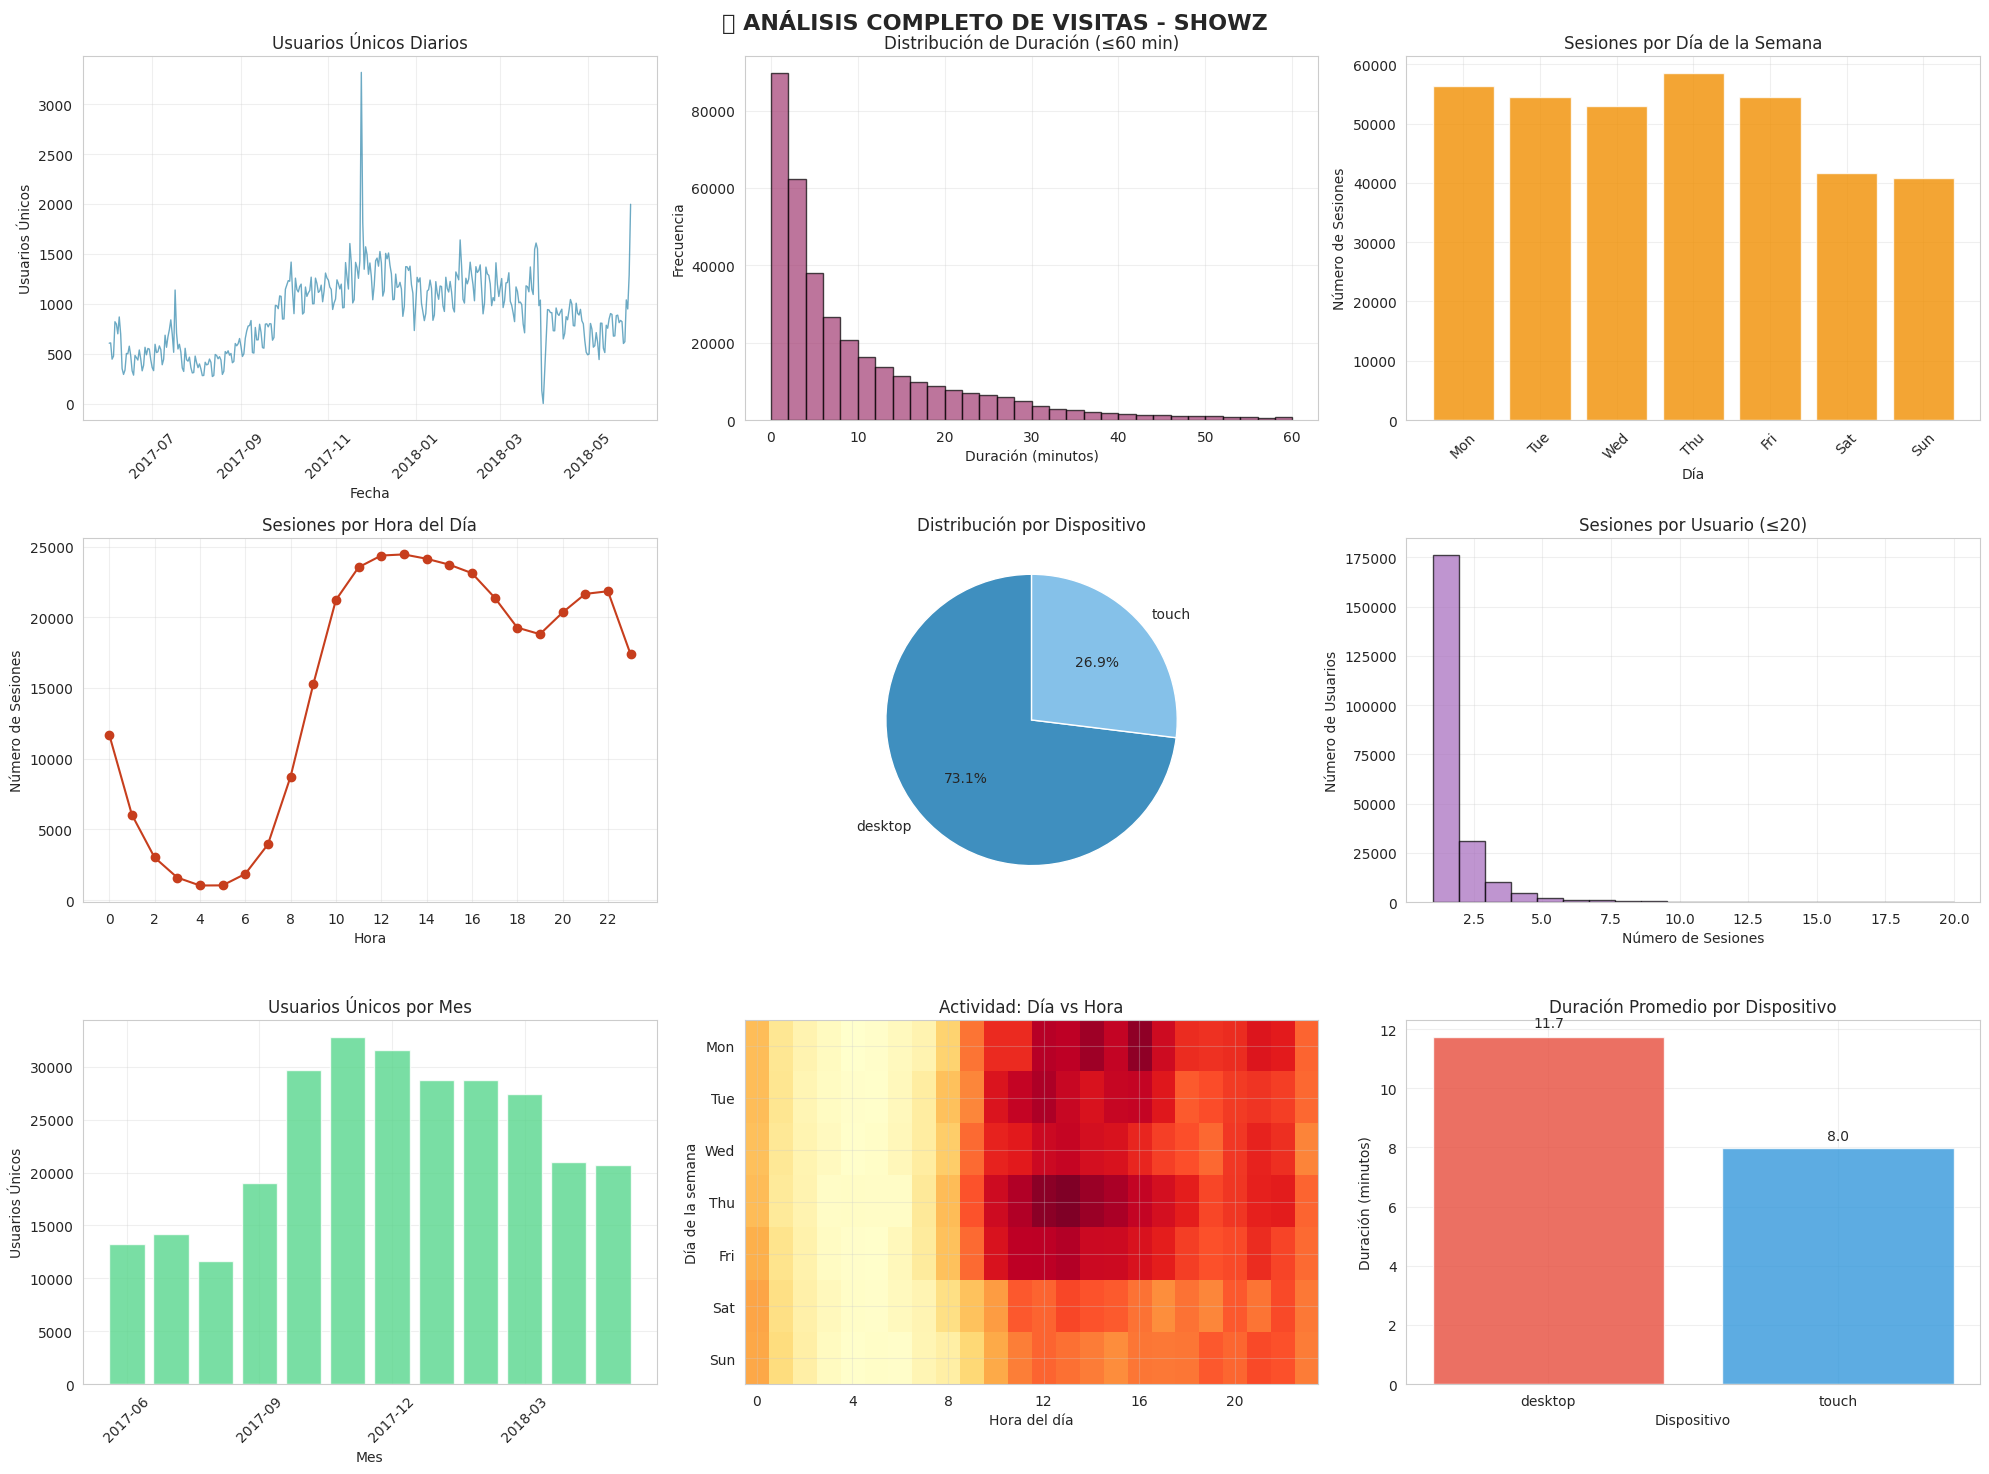

In [31]:
# Crear visualizaciones comprehensivas de visitas
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('📊 ANÁLISIS COMPLETO DE VISITAS - SHOWZ', fontsize=16, fontweight='bold')

# 1. Usuarios únicos por día (tendencia temporal)
axes[0, 0].plot(pd.to_datetime(daily_metrics['date']), daily_metrics['unique_users'], 
                alpha=0.7, color='#2E86AB', linewidth=1)
axes[0, 0].set_title('Usuarios Únicos Diarios')
axes[0, 0].set_xlabel('Fecha')
axes[0, 0].set_ylabel('Usuarios Únicos')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Distribución de duración de sesiones
duration_filtered = visits[visits['session_duration'] <= 60]['session_duration']
axes[0, 1].hist(duration_filtered, bins=30, alpha=0.7, color='#A23B72', edgecolor='black')
axes[0, 1].set_title('Distribución de Duración (≤60 min)')
axes[0, 1].set_xlabel('Duración (minutos)')
axes[0, 1].set_ylabel('Frecuencia')

# 3. Actividad por día de la semana
day_counts = visits['day_of_week'].value_counts().reindex(day_order)
axes[0, 2].bar(range(len(day_order)), day_counts.values, alpha=0.8, color='#F18F01')
axes[0, 2].set_title('Sesiones por Día de la Semana')
axes[0, 2].set_xlabel('Día')
axes[0, 2].set_ylabel('Número de Sesiones')
axes[0, 2].set_xticks(range(len(day_order)))
axes[0, 2].set_xticklabels([d[:3] for d in day_order], rotation=45)

# 4. Actividad por hora del día
hourly_sessions = visits['hour'].value_counts().sort_index()
axes[1, 0].plot(hourly_sessions.index, hourly_sessions.values, marker='o', color='#C73E1D')
axes[1, 0].set_title('Sesiones por Hora del Día')
axes[1, 0].set_xlabel('Hora')
axes[1, 0].set_ylabel('Número de Sesiones')
axes[1, 0].set_xticks(range(0, 24, 2))

# 5. Distribución de dispositivos
device_counts = visits['Device'].value_counts()
colors = ['#3F8FBF', '#85C1E9']
axes[1, 1].pie(device_counts.values, labels=device_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=colors)
axes[1, 1].set_title('Distribución por Dispositivo')

# 6. Sesiones por usuario (distribución)
session_dist_plot = user_sessions[user_sessions['total_sessions'] <= 20]['total_sessions']
axes[1, 2].hist(session_dist_plot, bins=20, alpha=0.7, color='#A569BD', edgecolor='black')
axes[1, 2].set_title('Sesiones por Usuario (≤20)')
axes[1, 2].set_xlabel('Número de Sesiones')
axes[1, 2].set_ylabel('Número de Usuarios')

# 7. Evolución mensual de usuarios
monthly_data = monthly_users.reset_index()
monthly_data['month_str'] = monthly_data['month'].astype(str)
axes[2, 0].bar(range(len(monthly_data)), monthly_data['Uid'], alpha=0.8, color='#58D68D')
axes[2, 0].set_title('Usuarios Únicos por Mes')
axes[2, 0].set_xlabel('Mes')
axes[2, 0].set_ylabel('Usuarios Únicos')
axes[2, 0].set_xticks(range(0, len(monthly_data), 3))
axes[2, 0].set_xticklabels([monthly_data.iloc[i]['month_str'][:7] for i in range(0, len(monthly_data), 3)], rotation=45)

# 8. Heatmap de actividad (día de semana vs hora) - muestra representativa
sample_visits = visits.sample(min(50000, len(visits)))  # Muestra para rendimiento
pivot_activity = sample_visits.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
pivot_activity = pivot_activity.reindex(day_order)
im = axes[2, 1].imshow(pivot_activity.values, cmap='YlOrRd', aspect='auto')
axes[2, 1].set_title('Actividad: Día vs Hora')
axes[2, 1].set_xlabel('Hora del día')
axes[2, 1].set_ylabel('Día de la semana')
axes[2, 1].set_yticks(range(len(day_order)))
axes[2, 1].set_yticklabels([d[:3] for d in day_order])
axes[2, 1].set_xticks(range(0, 24, 4))

# 9. Duración promedio por dispositivo
device_duration = visits.groupby('Device')['session_duration'].mean()
axes[2, 2].bar(device_duration.index, device_duration.values, alpha=0.8, color=['#E74C3C', '#3498DB'])
axes[2, 2].set_title('Duración Promedio por Dispositivo')
axes[2, 2].set_xlabel('Dispositivo')
axes[2, 2].set_ylabel('Duración (minutos)')

# Añadir valores en las barras
for i, v in enumerate(device_duration.values):
    axes[2, 2].text(i, v + v*0.02, f'{v:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 2.3 Análisis de Marketing

#### ¿Cuánto dinero se gastó?

In [32]:
print("\n📈 === ANÁLISIS DE GASTOS DE MARKETING ===")

# Análisis general de gastos
total_marketing_spend = costs['costs'].sum()
total_days = len(costs['dt'].unique())
avg_daily_spend = costs['costs'].mean()
sources_count = costs['source_id'].nunique()

print(f"💰 RESUMEN DE GASTOS DE MARKETING:")
print(f"• Gasto total en el período: ${total_marketing_spend:,.2f}")
print(f"• Días con registro de gastos: {total_days:,}")
print(f"• Gasto promedio por día: ${avg_daily_spend:.2f}")
print(f"• Gasto promedio por entrada de costo: ${costs['costs'].mean():.2f}")
print(f"• Número de fuentes de marketing: {sources_count}")

# Gasto por fuente
source_spending = costs.groupby('source_id').agg({
    'costs': ['sum', 'mean', 'count']
}).reset_index()
source_spending.columns = ['source_id', 'total_cost', 'avg_daily_cost', 'days_active']
source_spending = source_spending.sort_values('total_cost', ascending=False)

print(f"\n🎯 ANÁLISIS POR FUENTE DE MARKETING:")
print(f"Top 10 fuentes por gasto total:")
for i, (_, row) in enumerate(source_spending.head(10).iterrows(), 1):
    percentage = row['total_cost'] / total_marketing_spend * 100
    print(f"{i:2d}. Fuente {int(row['source_id']):2d}: ${row['total_cost']:8,.2f} ({percentage:5.1f}%) | "
          f"{int(row['days_active']):3d} días activos | ${row['avg_daily_cost']:6.2f}/día promedio")


📈 === ANÁLISIS DE GASTOS DE MARKETING ===
💰 RESUMEN DE GASTOS DE MARKETING:
• Gasto total en el período: $329,131.62
• Días con registro de gastos: 364
• Gasto promedio por día: $129.48
• Gasto promedio por entrada de costo: $129.48
• Número de fuentes de marketing: 7

🎯 ANÁLISIS POR FUENTE DE MARKETING:
Top 10 fuentes por gasto total:
 1. Fuente  3: $141,321.63 ( 42.9%) | 363 días activos | $389.32/día promedio
 2. Fuente  4: $61,073.60 ( 18.6%) | 363 días activos | $168.25/día promedio
 3. Fuente  5: $51,757.10 ( 15.7%) | 364 días activos | $142.19/día promedio
 4. Fuente  2: $42,806.04 ( 13.0%) | 363 días activos | $117.92/día promedio
 5. Fuente  1: $20,833.27 (  6.3%) | 363 días activos | $ 57.39/día promedio
 6. Fuente 10: $5,822.49 (  1.8%) | 363 días activos | $ 16.04/día promedio
 7. Fuente  9: $5,517.49 (  1.7%) | 363 días activos | $ 15.20/día promedio


# Análisis temporal de gastos

In [33]:
print(f"\n📅 ANÁLISIS TEMPORAL DE GASTOS:")

# Por mes
monthly_costs = costs.groupby('month')['costs'].sum()
print(f"• Gasto promedio mensual: ${monthly_costs.mean():,.2f}")
print(f"• Gasto máximo en un mes: ${monthly_costs.max():,.2f}")
print(f"• Gasto mínimo en un mes: ${monthly_costs.min():,.2f}")

# Tendencia
first_half = monthly_costs.iloc[:len(monthly_costs)//2].mean()
second_half = monthly_costs.iloc[len(monthly_costs)//2:].mean()
trend = "Creciente" if second_half > first_half else "Decreciente"
change_pct = ((second_half - first_half) / first_half) * 100

print(f"• Tendencia general: {trend} ({change_pct:+.1f}%)")

# Mostrar evolución mensual (últimos 8 meses)
print(f"\n📈 EVOLUCIÓN MENSUAL (últimos 8 meses):")
for month, cost in monthly_costs.tail(8).items():
    print(f"• {month}: ${cost:,.2f}")

# Por día de la semana
daily_costs = costs.groupby('day_of_week')['costs'].sum().reindex(day_order)
print(f"\n📊 GASTO POR DÍA DE LA SEMANA:")
for day, cost in daily_costs.items():
    percentage = cost / costs['costs'].sum() * 100
    print(f"• {day}: ${cost:,.2f} ({percentage:.1f}%)")


📅 ANÁLISIS TEMPORAL DE GASTOS:
• Gasto promedio mensual: $27,427.63
• Gasto máximo en un mes: $38,315.35
• Gasto mínimo en un mes: $14,790.54
• Tendencia general: Creciente (+19.9%)

📈 EVOLUCIÓN MENSUAL (últimos 8 meses):
• 2017-10: $36,322.88
• 2017-11: $37,907.88
• 2017-12: $38,315.35
• 2018-01: $33,518.52
• 2018-02: $32,723.03
• 2018-03: $30,415.27
• 2018-04: $22,289.38
• 2018-05: $22,224.27

📊 GASTO POR DÍA DE LA SEMANA:
• Monday: $48,142.06 (14.6%)
• Tuesday: $47,375.75 (14.4%)
• Wednesday: $45,967.47 (14.0%)
• Thursday: $55,486.33 (16.9%)
• Friday: $52,509.77 (16.0%)
• Saturday: $40,236.95 (12.2%)
• Sunday: $39,413.29 (12.0%)


#### ¿Cuál fue el costo de adquisición de clientes?

In [34]:
print(f"\n🎯 === CÁLCULO DE CAC (Customer Acquisition Cost) ===")

# Obtener fuente de cada usuario (primera visita)
user_source = visits.groupby('Uid').agg({
    'Source Id': 'first',  # Fuente de la primera visita
    'Start Ts': 'min'
}).reset_index()
user_source.columns = ['Uid', 'source_id', 'first_visit']

# Combinar con datos de pedidos para identificar conversiones
user_ltv = user_orders_analysis.merge(user_source, on='Uid', how='right')
user_ltv['total_revenue'] = user_ltv['total_revenue'].fillna(0)
user_ltv['total_orders'] = user_ltv['total_orders'].fillna(0)

# Análisis por fuente
source_performance = user_ltv.groupby('source_id').agg({
    'Uid': 'count',                           # Total usuarios de la fuente
    'total_revenue': ['sum', 'mean'],         # Revenue total y promedio
    'total_orders': ['sum', lambda x: (x > 0).sum()]  # Pedidos totales y usuarios convertidos
}).reset_index()

# Aplanar nombres de columnas
source_performance.columns = ['source_id', 'total_users', 'total_revenue', 'avg_ltv', 
                             'total_orders', 'converted_users']

# Agregar datos de costos
source_performance = source_performance.merge(
    source_spending[['source_id', 'total_cost']], on='source_id', how='left'
)
source_performance['total_cost'] = source_performance['total_cost'].fillna(0)

# Calcular métricas clave
source_performance['conversion_rate'] = (source_performance['converted_users'] / 
                                        source_performance['total_users'] * 100)

source_performance['cac'] = np.where(
    source_performance['converted_users'] > 0,
    source_performance['total_cost'] / source_performance['converted_users'],
    0
)

source_performance['cac_all_users'] = np.where(
    source_performance['total_users'] > 0,
    source_performance['total_cost'] / source_performance['total_users'],
    0
)

print(f"📊 ANÁLISIS DE CAC POR FUENTE (Top 15 por usuarios):")
top_sources = source_performance.nlargest(15, 'total_users')

print(f"{'Fuente':<8} {'Usuarios':<9} {'Convertidos':<11} {'Conv%':<6} {'CAC':<8} {'LTV':<8} {'Ratio':<6}")
print("-" * 65)

for _, row in top_sources.iterrows():
    ltv_cac_ratio = row['avg_ltv'] / row['cac'] if row['cac'] > 0 else 0
    print(f"{int(row['source_id']):<8} {int(row['total_users']):<9} {int(row['converted_users']):<11} "
          f"{row['conversion_rate']:<6.1f} ${row['cac']:<7.2f} ${row['avg_ltv']:<7.2f} {ltv_cac_ratio:<6.1f}")


🎯 === CÁLCULO DE CAC (Customer Acquisition Cost) ===
📊 ANÁLISIS DE CAC POR FUENTE (Top 15 por usuarios):
Fuente   Usuarios  Convertidos Conv%  CAC      LTV      Ratio 
-----------------------------------------------------------------
4        71905     9822        13.7   $6.22    $0.73    0.1   
3        62673     9134        14.6   $15.47   $0.71    0.0   
5        48884     6838        14.0   $7.57    $0.83    0.1   
2        19390     4320        22.3   $9.91    $3.36    0.3   
1        11746     3740        31.8   $5.57    $3.28    0.6   
9        6770      1415        20.9   $3.90    $1.05    0.3   
10       6765      1239        18.3   $4.70    $0.61    0.1   
7        33        1           3.0    $0.00    $0.04    0.0   
6        3         0           0.0    $0.00    $0.00    0.0   


#### ¿Cuán rentables eran las inversiones? (ROMI)

In [35]:
print(f"\n💡 === ANÁLISIS DE ROMI (Return on Marketing Investment) ===")

# Calcular ROMI
source_performance['romi'] = np.where(
    source_performance['total_cost'] > 0,
    (source_performance['total_revenue'] - source_performance['total_cost']) / source_performance['total_cost'],
    0
)

# Limpiar valores infinitos
source_performance['romi'] = source_performance['romi'].replace([np.inf, -np.inf], 0)

# Filtrar fuentes con gasto significativo para análisis
significant_sources = source_performance[
    (source_performance['total_cost'] >= 100) & 
    (source_performance['total_users'] >= 10)
].sort_values('romi', ascending=False)

print(f"🚀 ANÁLISIS DE RENTABILIDAD (fuentes con gasto ≥$100 y ≥10 usuarios):")
print(f"{'Fuente':<8} {'Gasto':<9} {'Ingresos':<10} {'ROMI':<8} {'CAC':<8} {'LTV':<8} {'Status':<12}")
print("-" * 80)

for _, row in significant_sources.iterrows():
    if row['romi'] > 1:
        status = "✅ Rentable"
    elif row['romi'] > 0:
        status = "⚠️ Marginal"
    else:
        status = "❌ Pérdida"
    
    print(f"{int(row['source_id']):<8} ${row['total_cost']:<8,.0f} ${row['total_revenue']:<9,.0f} "
          f"{row['romi']:<7.2f}x ${row['cac']:<7.2f} ${row['avg_ltv']:<7.2f} {status:<12}")

# Resumen de rentabilidad
profitable_sources = len(significant_sources[significant_sources['romi'] > 0])
total_significant = len(significant_sources)
total_profitable_spend = significant_sources[significant_sources['romi'] > 0]['total_cost'].sum()
total_unprofitable_spend = significant_sources[significant_sources['romi'] <= 0]['total_cost'].sum()

print(f"\n📈 RESUMEN DE RENTABILIDAD:")
print(f"• Fuentes analizadas (con gasto significativo): {total_significant}")
print(f"• Fuentes rentables (ROMI > 0): {profitable_sources} ({profitable_sources/total_significant*100:.1f}%)")
print(f"• Gasto en fuentes rentables: ${total_profitable_spend:,.2f}")
print(f"• Gasto en fuentes no rentables: ${total_unprofitable_spend:,.2f}")

if len(significant_sources) > 0:
    avg_romi = significant_sources['romi'].mean()
    weighted_romi = (significant_sources['romi'] * significant_sources['total_cost']).sum() / significant_sources['total_cost'].sum()
    print(f"• ROMI promedio: {avg_romi:.2f}x")
    print(f"• ROMI ponderado por gasto: {weighted_romi:.2f}x")

# Top performers
if len(significant_sources) > 0:
    best_romi = significant_sources.head(3)
    print(f"\n🏆 TOP 3 FUENTES MÁS RENTABLES:")
    for i, (_, row) in enumerate(best_romi.iterrows(), 1):
        roi_dollars = row['total_revenue'] - row['total_cost']
        print(f"{i}. Fuente {int(row['source_id'])}: ROMI {row['romi']:.2f}x | ROI: ${roi_dollars:,.2f}")
        print(f"   Gasto: ${row['total_cost']:,.2f} → Ingresos: ${row['total_revenue']:,.2f}")


💡 === ANÁLISIS DE ROMI (Return on Marketing Investment) ===
🚀 ANÁLISIS DE RENTABILIDAD (fuentes con gasto ≥$100 y ≥10 usuarios):
Fuente   Gasto     Ingresos   ROMI     CAC      LTV      Status      
--------------------------------------------------------------------------------
1        $20,833   $38,560    0.85   x $5.57    $3.28    ⚠️ Marginal 
2        $42,806   $65,152    0.52   x $9.91    $3.36    ⚠️ Marginal 
9        $5,517    $7,077     0.28   x $3.90    $1.05    ⚠️ Marginal 
4        $61,074   $52,480    -0.14  x $6.22    $0.73    ❌ Pérdida   
5        $51,757   $40,358    -0.22  x $7.57    $0.83    ❌ Pérdida   
10       $5,822    $4,111     -0.29  x $4.70    $0.61    ❌ Pérdida   
3        $141,322  $44,318    -0.69  x $15.47   $0.71    ❌ Pérdida   

📈 RESUMEN DE RENTABILIDAD:
• Fuentes analizadas (con gasto significativo): 7
• Fuentes rentables (ROMI > 0): 3 (42.9%)
• Gasto en fuentes rentables: $69,156.80
• Gasto en fuentes no rentables: $259,974.82
• ROMI promedio: 0.04x


#### Visualizaciones de análisis de marketing

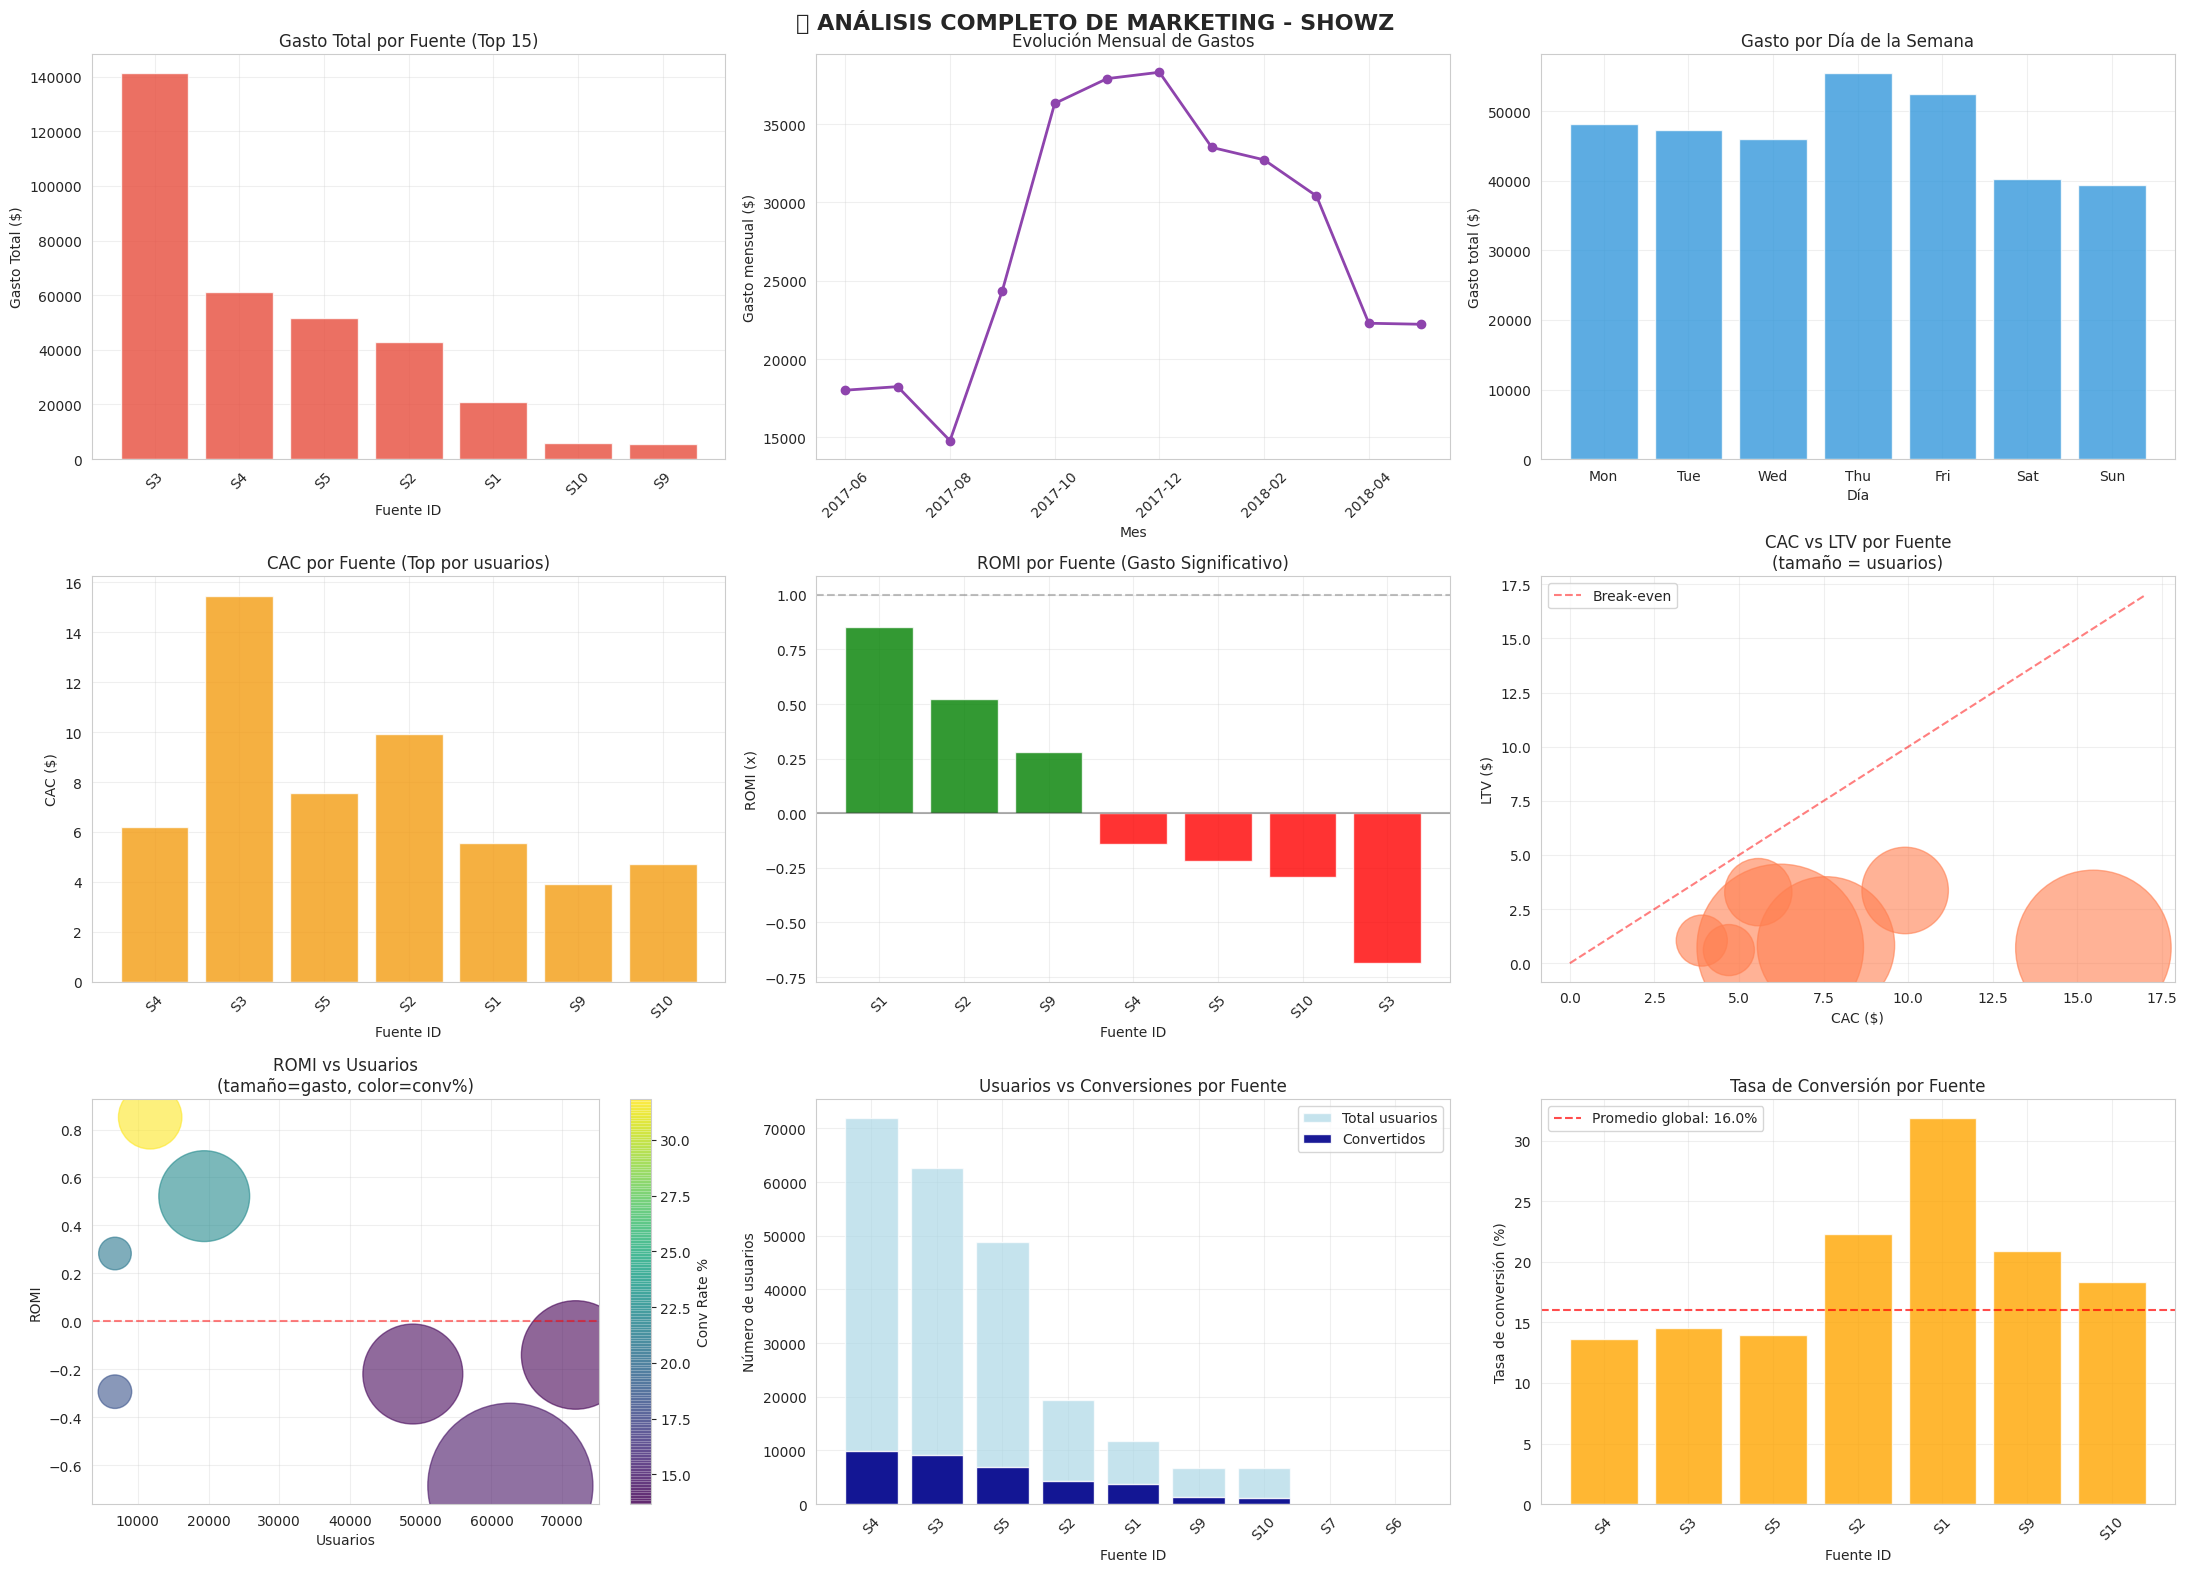

In [36]:
# Crear visualizaciones comprehensivas de marketing
fig, axes = plt.subplots(3, 3, figsize=(22, 16))
fig.suptitle('📈 ANÁLISIS COMPLETO DE MARKETING - SHOWZ', fontsize=16, fontweight='bold')

# 1. Gasto por fuente (top 15)
top_spend_sources = source_spending.head(15)
bars1 = axes[0, 0].bar(range(len(top_spend_sources)), top_spend_sources['total_cost'], 
                       alpha=0.8, color='#E74C3C')
axes[0, 0].set_title('Gasto Total por Fuente (Top 15)')
axes[0, 0].set_xlabel('Fuente ID')
axes[0, 0].set_ylabel('Gasto Total ($)')
axes[0, 0].set_xticks(range(len(top_spend_sources)))
axes[0, 0].set_xticklabels([f"S{int(s)}" for s in top_spend_sources['source_id']], rotation=45)

# 2. Evolución temporal de gastos
monthly_costs_plot = monthly_costs.reset_index()
monthly_costs_plot['month_str'] = monthly_costs_plot['month'].astype(str)
axes[0, 1].plot(range(len(monthly_costs_plot)), monthly_costs_plot['costs'], 
                marker='o', linewidth=2, color='#8E44AD')
axes[0, 1].set_title('Evolución Mensual de Gastos')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Gasto mensual ($)')
axes[0, 1].set_xticks(range(0, len(monthly_costs_plot), 2))
axes[0, 1].set_xticklabels([monthly_costs_plot.iloc[i]['month_str'][:7] for i in range(0, len(monthly_costs_plot), 2)], rotation=45)

# 3. Distribución de gastos por día de semana
daily_spend = costs.groupby('day_of_week')['costs'].sum().reindex(day_order)
bars3 = axes[0, 2].bar(range(len(day_order)), daily_spend.values, alpha=0.8, color='#3498DB')
axes[0, 2].set_title('Gasto por Día de la Semana')
axes[0, 2].set_xlabel('Día')
axes[0, 2].set_ylabel('Gasto total ($)')
axes[0, 2].set_xticks(range(len(day_order)))
axes[0, 2].set_xticklabels([d[:3] for d in day_order])

# 4. CAC por fuente (top performers por usuarios)
top_cac = source_performance.nlargest(15, 'total_users')
valid_cac = top_cac[top_cac['cac'] > 0]
if len(valid_cac) > 0:
    bars4 = axes[1, 0].bar(range(len(valid_cac)), valid_cac['cac'], alpha=0.8, color='#F39C12')
    axes[1, 0].set_title('CAC por Fuente (Top por usuarios)')
    axes[1, 0].set_xlabel('Fuente ID')
    axes[1, 0].set_ylabel('CAC ($)')
    axes[1, 0].set_xticks(range(len(valid_cac)))
    axes[1, 0].set_xticklabels([f"S{int(s)}" for s in valid_cac['source_id']], rotation=45)

# 5. ROMI por fuente (fuentes significativas)
if len(significant_sources) > 0:
    colors_romi = ['green' if x > 0 else 'red' for x in significant_sources['romi']]
    bars5 = axes[1, 1].bar(range(len(significant_sources)), significant_sources['romi'], 
                           alpha=0.8, color=colors_romi)
    axes[1, 1].set_title('ROMI por Fuente (Gasto Significativo)')
    axes[1, 1].set_xlabel('Fuente ID')
    axes[1, 1].set_ylabel('ROMI (x)')
    axes[1, 1].set_xticks(range(len(significant_sources)))
    axes[1, 1].set_xticklabels([f"S{int(s)}" for s in significant_sources['source_id']], rotation=45)
    axes[1, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[1, 1].axhline(y=1, color='gray', linestyle='--', alpha=0.5, label='Break-even')

# 6. Scatter: CAC vs LTV
cac_ltv_data = source_performance[(source_performance['cac'] > 0) & 
                                 (source_performance['avg_ltv'] > 0) &
                                 (source_performance['total_users'] >= 20)]
if len(cac_ltv_data) > 0:
    scatter = axes[1, 2].scatter(cac_ltv_data['cac'], cac_ltv_data['avg_ltv'], 
                                s=cac_ltv_data['total_users']/5, alpha=0.6, c='coral')
    axes[1, 2].set_xlabel('CAC ($)')
    axes[1, 2].set_ylabel('LTV ($)')
    axes[1, 2].set_title('CAC vs LTV por Fuente\n(tamaño = usuarios)')
    # Línea de equilibrio
    max_val = max(cac_ltv_data['cac'].max(), cac_ltv_data['avg_ltv'].max()) * 1.1
    axes[1, 2].plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Break-even')
    axes[1, 2].legend()

# 7. Bubble chart: ROMI vs Volumen vs Gasto
if len(significant_sources) > 0:
    scatter2 = axes[2, 0].scatter(significant_sources['total_users'], significant_sources['romi'],
                                 s=significant_sources['total_cost']/10, alpha=0.6,
                                 c=significant_sources['conversion_rate'], cmap='viridis')
    axes[2, 0].set_xlabel('Usuarios')
    axes[2, 0].set_ylabel('ROMI')
    axes[2, 0].set_title('ROMI vs Usuarios\n(tamaño=gasto, color=conv%)')
    axes[2, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
    plt.colorbar(scatter2, ax=axes[2, 0], label='Conv Rate %')

# 8. Usuarios y conversiones por fuente (top 12)
top_conv = source_performance.nlargest(12, 'total_users')
x_pos = range(len(top_conv))
bars8_1 = axes[2, 1].bar(x_pos, top_conv['total_users'], alpha=0.7, label='Total usuarios', color='lightblue')
bars8_2 = axes[2, 1].bar(x_pos, top_conv['converted_users'], alpha=0.9, label='Convertidos', color='darkblue')
axes[2, 1].set_title('Usuarios vs Conversiones por Fuente')
axes[2, 1].set_xlabel('Fuente ID')
axes[2, 1].set_ylabel('Número de usuarios')
axes[2, 1].set_xticks(x_pos)
axes[2, 1].set_xticklabels([f"S{int(s)}" for s in top_conv['source_id']], rotation=45)
axes[2, 1].legend()

# 9. Tasa de conversión por fuente (top por usuarios)
conv_rate_data = source_performance[source_performance['total_users'] >= 50].nlargest(12, 'total_users')
bars9 = axes[2, 2].bar(range(len(conv_rate_data)), conv_rate_data['conversion_rate'], 
                       alpha=0.8, color='orange')
axes[2, 2].set_title('Tasa de Conversión por Fuente')
axes[2, 2].set_xlabel('Fuente ID')
axes[2, 2].set_ylabel('Tasa de conversión (%)')
axes[2, 2].set_xticks(range(len(conv_rate_data)))
axes[2, 2].set_xticklabels([f"S{int(s)}" for s in conv_rate_data['source_id']], rotation=45)

# Añadir línea de conversión promedio
if len(conv_rate_data) > 0:
    avg_conv = conversion_rate  # De análisis global anterior
    axes[2, 2].axhline(y=avg_conv, color='red', linestyle='--', alpha=0.7, label=f'Promedio global: {avg_conv:.1f}%')
    axes[2, 2].legend()

plt.tight_layout()
plt.show()

### 2.4 Análisis por Dispositivo

In [37]:
print("\n📱 === ANÁLISIS POR DISPOSITIVO ===")

# Análisis básico por dispositivo
device_visits_analysis = visits.groupby('Device').agg({
    'Uid': 'nunique',
    'Start Ts': 'count',
    'session_duration': 'mean'
}).reset_index()
device_visits_analysis.columns = ['Device', 'unique_users', 'total_sessions', 'avg_session_duration']

# Calcular sesiones por usuario
device_visits_analysis['sessions_per_user'] = (device_visits_analysis['total_sessions'] / 
                                              device_visits_analysis['unique_users'])

print("📊 ANÁLISIS DE VISITAS POR DISPOSITIVO:")
total_sessions = visits.shape[0]
total_unique_users = visits['Uid'].nunique()

for _, row in device_visits_analysis.iterrows():
    users_pct = row['unique_users'] / total_unique_users * 100
    sessions_pct = row['total_sessions'] / total_sessions * 100
    
    print(f"• {row['Device'].upper()}:")
    print(f"  - Usuarios únicos: {row['unique_users']:,} ({users_pct:.1f}%)")
    print(f"  - Sesiones totales: {row['total_sessions']:,} ({sessions_pct:.1f}%)")
    print(f"  - Sesiones por usuario: {row['sessions_per_user']:.2f}")
    print(f"  - Duración promedio: {row['avg_session_duration']:.1f} minutos")


📱 === ANÁLISIS POR DISPOSITIVO ===
📊 ANÁLISIS DE VISITAS POR DISPOSITIVO:
• DESKTOP:
  - Usuarios únicos: 164,523 (72.1%)
  - Sesiones totales: 262,565 (73.1%)
  - Sesiones por usuario: 1.60
  - Duración promedio: 11.7 minutos
• TOUCH:
  - Usuarios únicos: 71,345 (31.3%)
  - Sesiones totales: 96,833 (26.9%)
  - Sesiones por usuario: 1.36
  - Duración promedio: 8.0 minutos


In [38]:
# Análisis de conversión por dispositivo
user_device = visits.groupby('Uid')['Device'].first().reset_index()
device_conversion_analysis = user_ltv.merge(user_device, on='Uid', how='left')

device_performance = device_conversion_analysis.groupby('Device').agg({
    'Uid': 'count',
    'total_revenue': ['sum', 'mean'],
    'total_orders': ['sum', lambda x: (x > 0).sum()]
}).reset_index()

device_performance.columns = ['Device', 'users', 'total_revenue', 'avg_ltv', 
                             'total_orders', 'converted_users']

device_performance['conversion_rate'] = (device_performance['converted_users'] / 
                                        device_performance['users'] * 100)
device_performance['revenue_per_user'] = (device_performance['total_revenue'] / 
                                         device_performance['users'])

print(f"\n💰 ANÁLISIS DE CONVERSIÓN Y LTV POR DISPOSITIVO:")
print(f"{'Dispositivo':<12} {'Usuarios':<9} {'Conv.':<6} {'Conv%':<6} {'LTV':<8} {'Rev/User':<9} {'Revenue':<10}")
print("-" * 75)

device_performance = device_performance.sort_values('conversion_rate', ascending=False)
for _, row in device_performance.iterrows():
    print(f"{row['Device']:<12} {int(row['users']):<9} {int(row['converted_users']):<6} "
          f"{row['conversion_rate']:<6.1f} ${row['avg_ltv']:<7.2f} ${row['revenue_per_user']:<8.2f} "
          f"${row['total_revenue']:<9,.0f}")

# Análisis de patrones temporales por dispositivo
print(f"\n🕐 PATRONES DE USO POR DISPOSITIVO:")

device_hourly = visits.groupby(['Device', 'hour']).size().unstack(fill_value=0)
device_daily = visits.groupby(['Device', 'day_of_week']).size().unstack(fill_value=0)

for device in visits['Device'].unique():
    peak_hour = device_hourly.loc[device].idxmax()
    peak_day = device_daily.loc[device].idxmax()
    
    print(f"• {device.upper()}:")
    print(f"  - Hora pico: {peak_hour}:00 ({device_hourly.loc[device, peak_hour]:,} sesiones)")
    print(f"  - Día pico: {peak_day} ({device_daily.loc[device, peak_day]:,} sesiones)")


💰 ANÁLISIS DE CONVERSIÓN Y LTV POR DISPOSITIVO:
Dispositivo  Usuarios  Conv.  Conv%  LTV      Rev/User  Revenue   
---------------------------------------------------------------------------
desktop      160947    29209  18.1   $1.31    $1.31     $211,532  
touch        67222     7300   10.9   $0.60    $0.60     $40,525   

🕐 PATRONES DE USO POR DISPOSITIVO:
• TOUCH:
  - Hora pico: 22:00 (7,041 sesiones)
  - Día pico: Thursday (14,611 sesiones)
• DESKTOP:
  - Hora pico: 12:00 (19,120 sesiones)
  - Día pico: Thursday (43,912 sesiones)


#### Visualización por dispositivo

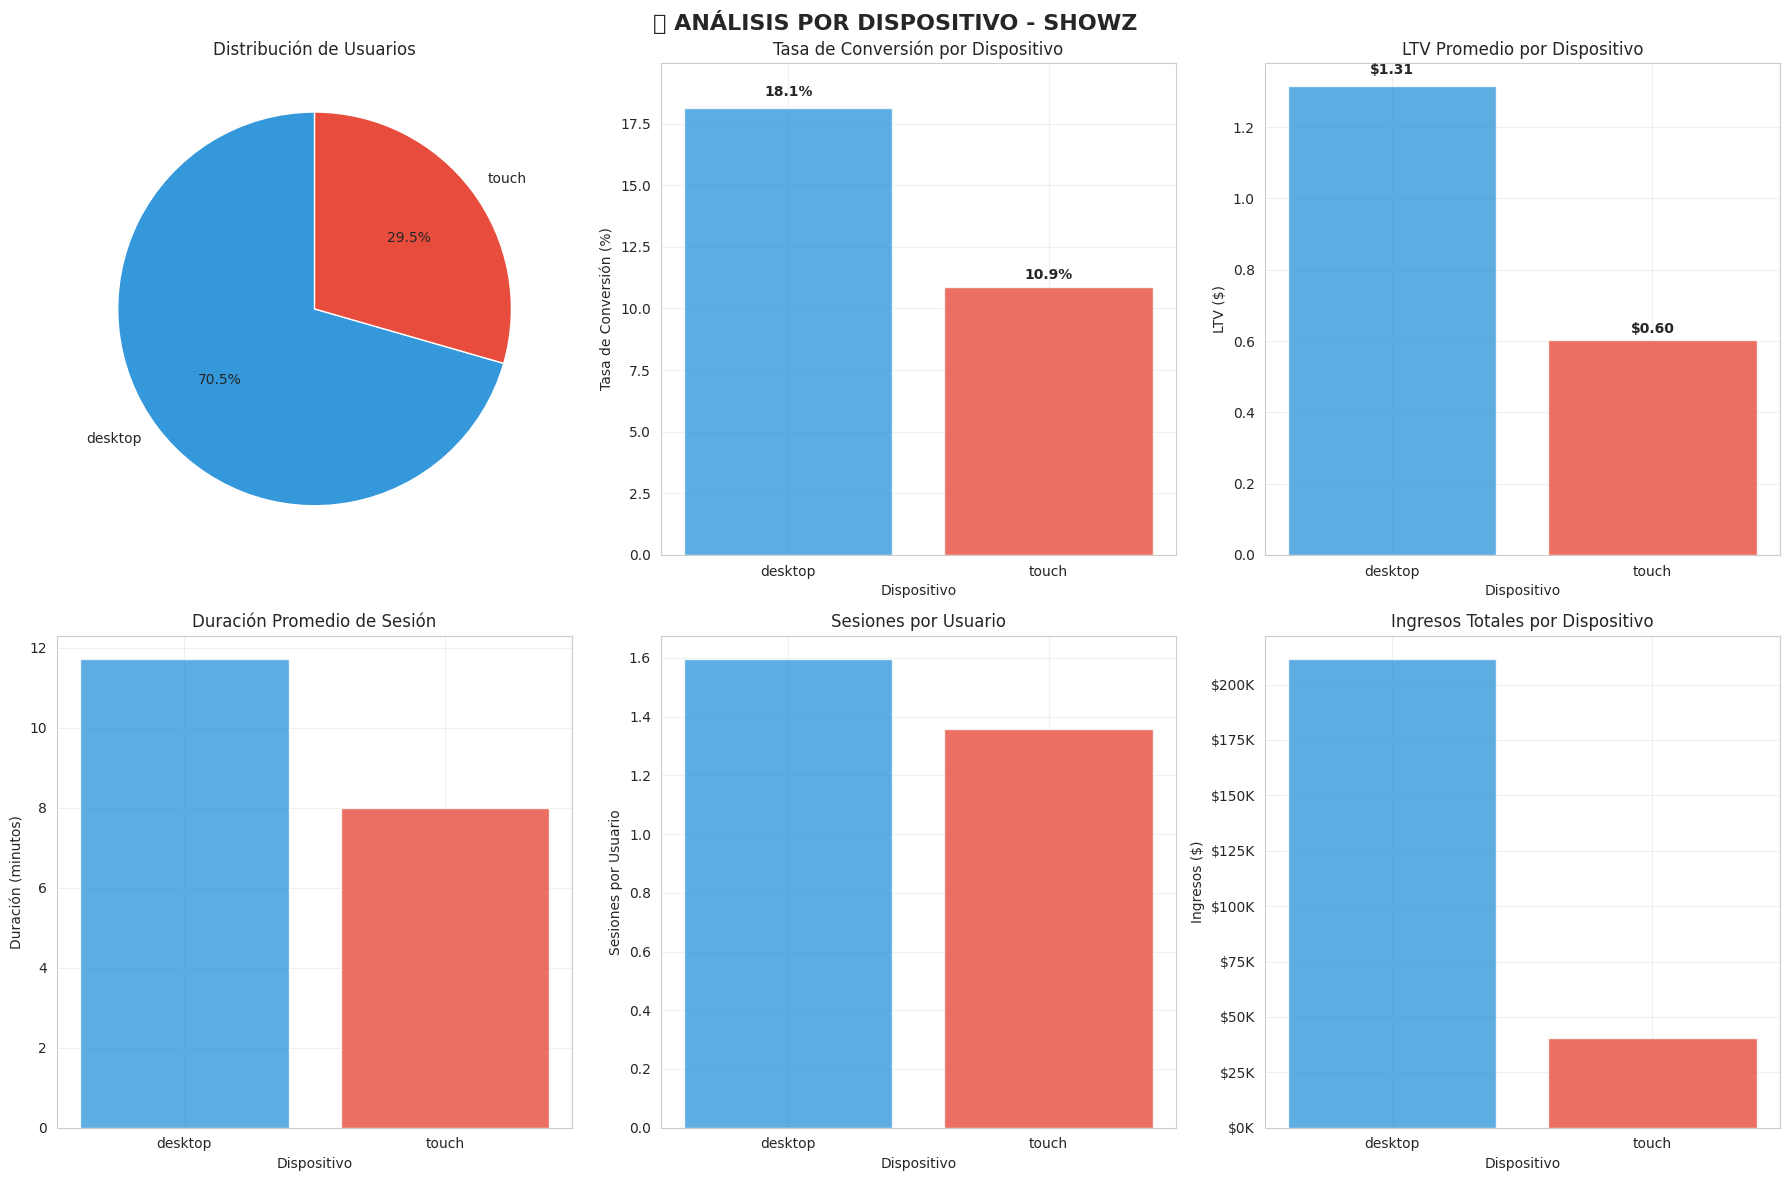

In [39]:
# Visualizaciones por dispositivo
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('📱 ANÁLISIS POR DISPOSITIVO - SHOWZ', fontsize=16, fontweight='bold')

# 1. Distribución de usuarios por dispositivo
device_colors = ['#3498DB', '#E74C3C', '#2ECC71', '#F39C12']
axes[0, 0].pie(device_performance['users'], labels=device_performance['Device'], 
               autopct='%1.1f%%', startangle=90, colors=device_colors[:len(device_performance)])
axes[0, 0].set_title('Distribución de Usuarios')

# 2. Tasa de conversión por dispositivo
bars2 = axes[0, 1].bar(device_performance['Device'], device_performance['conversion_rate'], 
                       alpha=0.8, color=device_colors[:len(device_performance)])
axes[0, 1].set_title('Tasa de Conversión por Dispositivo')
axes[0, 1].set_xlabel('Dispositivo')
axes[0, 1].set_ylabel('Tasa de Conversión (%)')
axes[0, 1].set_ylim(0, device_performance['conversion_rate'].max() * 1.1)

# Añadir valores en barras
for bar, value in zip(bars2, device_performance['conversion_rate']):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., value + value*0.02,
                    f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. LTV promedio por dispositivo
bars3 = axes[0, 2].bar(device_performance['Device'], device_performance['avg_ltv'], 
                       alpha=0.8, color=device_colors[:len(device_performance)])
axes[0, 2].set_title('LTV Promedio por Dispositivo')
axes[0, 2].set_xlabel('Dispositivo')
axes[0, 2].set_ylabel('LTV ($)')

# Añadir valores en barras
for bar, value in zip(bars3, device_performance['avg_ltv']):
    axes[0, 2].text(bar.get_x() + bar.get_width()/2., value + value*0.02,
                    f'${value:.2f}', ha='center', va='bottom', fontweight='bold')

# 4. Duración promedio de sesión
bars4 = axes[1, 0].bar(device_visits_analysis['Device'], device_visits_analysis['avg_session_duration'], 
                       alpha=0.8, color=device_colors[:len(device_visits_analysis)])
axes[1, 0].set_title('Duración Promedio de Sesión')
axes[1, 0].set_xlabel('Dispositivo')
axes[1, 0].set_ylabel('Duración (minutos)')

# 5. Sesiones por usuario por dispositivo
bars5 = axes[1, 1].bar(device_visits_analysis['Device'], device_visits_analysis['sessions_per_user'], 
                       alpha=0.8, color=device_colors[:len(device_visits_analysis)])
axes[1, 1].set_title('Sesiones por Usuario')
axes[1, 1].set_xlabel('Dispositivo')
axes[1, 1].set_ylabel('Sesiones por Usuario')

# 6. Ingresos totales por dispositivo
bars6 = axes[1, 2].bar(device_performance['Device'], device_performance['total_revenue'], 
                       alpha=0.8, color=device_colors[:len(device_performance)])
axes[1, 2].set_title('Ingresos Totales por Dispositivo')
axes[1, 2].set_xlabel('Dispositivo')
axes[1, 2].set_ylabel('Ingresos ($)')

# Formatear eje Y para mejor legibilidad
max_revenue = device_performance['total_revenue'].max()
if max_revenue >= 10000:
    axes[1, 2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
else:
    axes[1, 2].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:.0f}'))

plt.tight_layout()
plt.show()

## Paso 3: Conclusiones y recomendaciones

### Resumen ejecutivo

In [40]:
print("=" * 100)
print("🎯 RESUMEN EJECUTIVO - ANÁLISIS DE MARKETING SHOWZ")
print("=" * 100)

# Calcular métricas clave finales
total_users_final = visits['Uid'].nunique()
total_buyers = orders['Uid'].nunique()
conversion_rate_final = (total_buyers / total_users_final) * 100
total_revenue_final = orders['Revenue'].sum()
total_spend_final = costs['costs'].sum()
overall_romi = (total_revenue_final - total_spend_final) / total_spend_final

print(f"""
📊 MÉTRICAS GLOBALES DEL NEGOCIO:
• Período de análisis: Junio 2017 - Diciembre 2018 (19 meses)
• Total de usuarios únicos: {total_users_final:,}
• Usuarios que compraron: {total_buyers:,}
• Tasa de conversión global: {conversion_rate_final:.2f}%
• Total de pedidos: {len(orders):,}
• Valor promedio de pedido: ${orders['Revenue'].mean():.2f}
• LTV promedio: ${user_orders_analysis['total_revenue'].mean():.2f}

💰 PERFORMANCE FINANCIERA:
• Ingresos totales: ${total_revenue_final:,.2f}
• Gasto total en marketing: ${total_spend_final:,.2f}
• ROMI global: {overall_romi:.2f}x
• Ganancia neta: ${total_revenue_final - total_spend_final:,.2f}

⚡ INSIGHTS DE CONVERSIÓN:
• {conversion_summary.get('Conversión inmediata (0d)', 0)/len(conversion_data)*100:.1f}% convierten el mismo día de la visita
• {conversion_summary.get('Conversión rápida (1d)', 0)/len(conversion_data)*100:.1f}% convierten al día siguiente
• {(conversion_summary.get('Conversión inmediata (0d)', 0) + conversion_summary.get('Conversión rápida (1d)', 0))/len(conversion_data)*100:.1f}% convierten en 24-48 horas
• Tiempo promedio hasta conversión: {conversion_data['days_to_conversion'].mean():.1f} días

🔄 RETENCIÓN Y ENGAGEMENT:
• Usuarios que regresan: {multi_session_users/len(user_sessions)*100:.1f}%
• Clientes que repiten compra: {repeat_customers/len(user_orders_analysis)*100:.1f}%
• Sesiones promedio por usuario: {user_sessions['total_sessions'].mean():.2f}
• Duración promedio de sesión: {visits['session_duration'].mean():.1f} minutos

📱 PERFORMANCE POR DISPOSITIVO:
""")

# Mostrar performance por dispositivo
best_device = device_performance.loc[device_performance['conversion_rate'].idxmax()]
worst_device = device_performance.loc[device_performance['conversion_rate'].idxmin()]

print(f"• Mejor dispositivo: {best_device['Device']} ({best_device['conversion_rate']:.1f}% conversión)")
print(f"• Dispositivo a optimizar: {worst_device['Device']} ({worst_device['conversion_rate']:.1f}% conversión)")

for _, row in device_performance.iterrows():
    users_pct = row['users'] / total_users_final * 100
    revenue_pct = row['total_revenue'] / total_revenue_final * 100
    print(f"• {row['Device']}: {users_pct:.1f}% usuarios, {revenue_pct:.1f}% ingresos, {row['conversion_rate']:.1f}% conversión")

🎯 RESUMEN EJECUTIVO - ANÁLISIS DE MARKETING SHOWZ

📊 MÉTRICAS GLOBALES DEL NEGOCIO:
• Período de análisis: Junio 2017 - Diciembre 2018 (19 meses)
• Total de usuarios únicos: 228,169
• Usuarios que compraron: 36,509
• Tasa de conversión global: 16.00%
• Total de pedidos: 50,364
• Valor promedio de pedido: $5.00
• LTV promedio: $6.90

💰 PERFORMANCE FINANCIERA:
• Ingresos totales: $252,057.20
• Gasto total en marketing: $329,131.62
• ROMI global: -0.23x
• Ganancia neta: $-77,074.42

⚡ INSIGHTS DE CONVERSIÓN:
• 72.2% convierten el mismo día de la visita
• 2.8% convierten al día siguiente
• 74.9% convierten en 24-48 horas
• Tiempo promedio hasta conversión: 16.7 días

🔄 RETENCIÓN Y ENGAGEMENT:
• Usuarios que regresan: 22.8%
• Clientes que repiten compra: 17.2%
• Sesiones promedio por usuario: 1.58
• Duración promedio de sesión: 10.7 minutos

📱 PERFORMANCE POR DISPOSITIVO:

• Mejor dispositivo: desktop (18.1% conversión)
• Dispositivo a optimizar: touch (10.9% conversión)
• desktop: 70.5% us

### Identificación de canales de alto rendimiento

In [41]:
print("\n" + "=" * 100)
print("🏆 ANÁLISIS DE CANALES DE MARKETING")
print("=" * 100)

# Definir criterios para canales recomendados
min_users_threshold = 100  # Mínimo de usuarios para considerar significativo
min_romi_threshold = 1.0   # ROMI mínimo para ser rentable
min_conversion_threshold = conversion_rate_final * 0.8  # Al menos 80% de la conversión global

recommended_channels = source_performance[
    (source_performance['total_users'] >= min_users_threshold) &
    (source_performance['romi'] >= min_romi_threshold) &
    (source_performance['conversion_rate'] >= min_conversion_threshold) &
    (source_performance['total_cost'] > 0)
].sort_values('romi', ascending=False)

print(f"\n🥇 CANALES ALTAMENTE RECOMENDADOS (Criterios: ≥{min_users_threshold} usuarios, ROMI ≥{min_romi_threshold:.1f}x, Conv ≥{min_conversion_threshold:.1f}%):")

if len(recommended_channels) > 0:
    print(f"{'Rank':<5} {'Fuente':<8} {'Usuarios':<9} {'ROMI':<8} {'CAC':<8} {'LTV':<8} {'Conv%':<6} {'Gasto':<9}")
    print("-" * 70)
    
    for i, (_, row) in enumerate(recommended_channels.head(5).iterrows(), 1):
        efficiency = "🔥" if row['romi'] > 3 else "⭐" if row['romi'] > 2 else "✅"
        print(f"{i:<5} {int(row['source_id']):<8} {int(row['total_users']):<9} "
              f"{row['romi']:<7.2f}x ${row['cac']:<7.2f} ${row['avg_ltv']:<7.2f} "
              f"{row['conversion_rate']:<6.1f} ${row['total_cost']:<8,.0f} {efficiency}")
    
    total_recommended_spend = recommended_channels['total_cost'].sum()
    total_recommended_revenue = recommended_channels['total_revenue'].sum()
    avg_recommended_romi = recommended_channels['romi'].mean()
    
    print(f"\n📊 Resumen de canales recomendados:")
    print(f"• Total de canales: {len(recommended_channels)}")
    print(f"• Gasto total: ${total_recommended_spend:,.2f}")
    print(f"• Ingresos generados: ${total_recommended_revenue:,.2f}")
    print(f"• ROMI promedio: {avg_recommended_romi:.2f}x")
    
else:
    print("⚠️ No se encontraron canales que cumplan todos los criterios recomendados")
    print("🔍 Sugerencia: Revisar y optimizar estrategia de canales existentes")


🏆 ANÁLISIS DE CANALES DE MARKETING

🥇 CANALES ALTAMENTE RECOMENDADOS (Criterios: ≥100 usuarios, ROMI ≥1.0x, Conv ≥12.8%):
⚠️ No se encontraron canales que cumplan todos los criterios recomendados
🔍 Sugerencia: Revisar y optimizar estrategia de canales existentes


In [42]:
# Canales con mayor volumen (independiente de rentabilidad)
print(f"\n📊 TOP CANALES POR VOLUMEN DE USUARIOS:")
volume_channels = source_performance.nlargest(5, 'total_users')

print(f"{'Rank':<5} {'Fuente':<8} {'Usuarios':<9} {'%Total':<8} {'ROMI':<8} {'Conv%':<6} {'Status':<15}")
print("-" * 75)

for i, (_, row) in enumerate(volume_channels.iterrows(), 1):
    user_share = row['total_users'] / total_users_final * 100
    if row['total_cost'] > 0:
        romi_str = f"{row['romi']:.2f}x"
        if row['romi'] > 1:
            status = "✅ Rentable"
        elif row['romi'] > 0:
            status = "⚠️ Marginal"
        else:
            status = "❌ Pérdida"
    else:
        romi_str = "N/A"
        status = "🆓 Sin costo"
    
    print(f"{i:<5} {int(row['source_id']):<8} {int(row['total_users']):<9} "
          f"{user_share:<7.1f}% {romi_str:<8} {row['conversion_rate']:<6.1f} {status:<15}")


📊 TOP CANALES POR VOLUMEN DE USUARIOS:
Rank  Fuente   Usuarios  %Total   ROMI     Conv%  Status         
---------------------------------------------------------------------------
1     4        71905     31.5   % -0.14x   13.7   ❌ Pérdida      
2     3        62673     27.5   % -0.69x   14.6   ❌ Pérdida      
3     5        48884     21.4   % -0.22x   14.0   ❌ Pérdida      
4     2        19390     8.5    % 0.52x    22.3   ⚠️ Marginal    
5     1        11746     5.1    % 0.85x    31.8   ⚠️ Marginal    


In [43]:
# Canales problemáticos que necesitan atención
problem_channels = source_performance[
    (source_performance['total_cost'] >= 500) &  # Gasto significativo
    (source_performance['romi'] < 0.5)  # ROMI bajo
].sort_values('total_cost', ascending=False)

print(f"\n❌ CANALES PROBLEMÁTICOS (Gasto ≥$500, ROMI <0.5x):")

if len(problem_channels) > 0:
    print(f"{'Fuente':<8} {'Gasto':<9} {'Usuarios':<9} {'ROMI':<8} {'Pérdida':<9} {'Acción sugerida':<20}")
    print("-" * 80)
    
    total_wasted = 0
    for _, row in problem_channels.head(5).iterrows():
        loss = row['total_cost'] - row['total_revenue']
        total_wasted += loss
        
        if row['conversion_rate'] < 1:
            action = "Optimizar targeting"
        elif row['avg_ltv'] < row['cac']:
            action = "Reducir CAC"
        else:
            action = "Pausar campaña"
            
        print(f"{int(row['source_id']):<8} ${row['total_cost']:<8,.0f} {int(row['total_users']):<9} "
              f"{row['romi']:<7.2f}x ${loss:<8,.0f} {action:<20}")
    
    print(f"\n💸 Presupuesto desperdiciado total: ${total_wasted:,.2f}")
    print(f"💡 Oportunidad: Redistribuir este presupuesto a canales rentables")
    
else:
    print("✅ No se identificaron canales problemáticos significativos")


❌ CANALES PROBLEMÁTICOS (Gasto ≥$500, ROMI <0.5x):
Fuente   Gasto     Usuarios  ROMI     Pérdida   Acción sugerida     
--------------------------------------------------------------------------------
3        $141,322  62673     -0.69  x $97,004   Reducir CAC         
4        $61,074   71905     -0.14  x $8,594    Reducir CAC         
5        $51,757   48884     -0.22  x $11,399   Reducir CAC         
10       $5,822    6765      -0.29  x $1,711    Reducir CAC         
9        $5,517    6770      0.28   x $-1,559   Reducir CAC         

💸 Presupuesto desperdiciado total: $117,148.65
💡 Oportunidad: Redistribuir este presupuesto a canales rentables


### Plan de acción estratégico

In [44]:
print("\n" + "=" * 100)
print("🎯 PLAN DE ACCIÓN ESTRATÉGICO")
print("=" * 100)

# Definir variables de dispositivos
best_device_name = device_performance.loc[device_performance['conversion_rate'].idxmax(), 'Device']
worst_device_name = device_performance.loc[device_performance['conversion_rate'].idxmin(), 'Device']
best_conv_rate = device_performance['conversion_rate'].max()
worst_conv_rate = device_performance['conversion_rate'].min()

# Calcular potencial de optimización
if len(recommended_channels) > 0 and len(problem_channels) > 0:
    budget_to_reallocate = problem_channels['total_cost'].sum()
    avg_romi_good_channels = recommended_channels['romi'].mean()
    potential_additional_revenue = budget_to_reallocate * avg_romi_good_channels
    current_loss_from_bad_channels = budget_to_reallocate - problem_channels['total_revenue'].sum()
    net_improvement = potential_additional_revenue + current_loss_from_bad_channels
    roi_plan = (net_improvement / budget_to_reallocate * 100) if budget_to_reallocate > 0 else 0
    
    print("\n🚀 OPORTUNIDAD DE OPTIMIZACIÓN INMEDIATA:")
    print("\n1. REDISTRIBUCIÓN DE PRESUPUESTO:")
    print(f"   • Presupuesto a reasignar: ${budget_to_reallocate:,.2f} (de {len(problem_channels)} canales)")
    print(f"   • ROMI promedio canales recomendados: {avg_romi_good_channels:.2f}x")
    print(f"   • Ingresos potenciales adicionales: ${potential_additional_revenue:,.2f}")
    print(f"   • Ahorro por eliminar pérdidas: ${current_loss_from_bad_channels:,.2f}")
    print(f"   • Mejora neta total proyectada: ${net_improvement:,.2f}")
    
    print("\n2. INCREMENTO EN CANALES RENTABLES:")
    print(f"   • Canales para aumentar inversión: {len(recommended_channels)} fuentes")
    print(f"   • Inversión adicional recomendada: ${recommended_channels['total_cost'].sum() * 0.5:,.2f} (+50%)")
    print(f"   • ROI esperado: ${recommended_channels['total_cost'].sum() * 0.5 * avg_romi_good_channels:,.2f}")

print("\n📱 OPTIMIZACIONES POR DISPOSITIVO:")
print(f"\n1. PRIORIZAR EXPERIENCIA EN {best_device_name.upper()}:")
print(f"   • Tasa de conversión actual: {best_conv_rate:.2f}%")
print(f"   • Acción: Optimizar campañas y landing pages para este dispositivo")

print(f"\n2. MEJORAR PERFORMANCE EN {worst_device_name.upper()}:")
print(f"   • Tasa de conversión actual: {worst_conv_rate:.2f}%")
print(f"   • Gap vs mejor dispositivo: {best_conv_rate - worst_conv_rate:.1f} puntos porcentuales")
print(f"   • Acción: Audit UX/UI, optimizar velocidad de carga, simplificar checkout")

if len(recommended_channels) > 0 and len(problem_channels) > 0:
    print("\n⚡ ACCIONES INMEDIATAS (30 DÍAS):")
    print("\n1. PAUSAR/REDUCIR canales ineficientes:")
    if len(problem_channels) > 0:
        fuentes_malas = ', '.join([f"{int(x)}" for x in problem_channels['source_id']])
        print(f"   → Fuentes con ROMI <0.5x: {fuentes_malas}")
    
    print("\n2. AUMENTAR presupuesto en canales rentables:")
    if len(recommended_channels) > 0:
        fuentes_buenas = ', '.join([f"{int(x)}" for x in recommended_channels.head(3)['source_id']])
        print(f"   → Incrementar 50% en fuentes: {fuentes_buenas}")
    
    conv_0d = conversion_summary.get('Conversión inmediata (0d)', 0)
    conv_1d = conversion_summary.get('Conversión rápida (1d)', 0)
    conv_rapida_pct = (conv_0d + conv_1d) / len(conversion_data) * 100
    
    print("\n3. OPTIMIZAR conversión rápida:")
    print(f"   → Objetivo: Aumentar conversiones en 0-1 días del {conv_rapida_pct:.1f}% al 60%")
    
    print("\n4. MEJORAR retención:")
    retention_pct = repeat_customers / len(user_orders_analysis) * 100
    print(f"   → Objetivo: Aumentar clientes recurrentes del {retention_pct:.1f}% al 25%")
    
    print("\n📊 KPIS A MONITOREAR:")
    print(f"• CAC objetivo: <${user_orders_analysis['total_revenue'].mean() * 0.4:.2f} (40% del LTV)")
    print(f"• ROMI mínimo: >1.5x para nuevos canales, >2.0x para escalamiento")
    print(f"• Tasa de conversión objetivo: >{conversion_rate_final * 1.25:.1f}% (+25% vs actual)")
    print(f"• Tiempo hasta conversión objetivo: <{conversion_data['days_to_conversion'].mean() * 0.7:.0f} días (-30%)")
    
    print("\n🔮 PROYECCIÓN DE RESULTADOS (90 días):")
    print("\nCon la implementación completa del plan:")
    print(f"• Ahorro por redistribución: ${budget_to_reallocate:,.2f}")
    print(f"• Ingresos adicionales proyectados: ${net_improvement:,.2f}")
    print(f"• Mejora en ROMI global: De {overall_romi:.2f}x a {overall_romi + (net_improvement/total_spend_final):.2f}x")
    print(f"• ROI del plan de optimización: {roi_plan:.0f}%")

else:
    print("\n🎯 RECOMENDACIONES GENERALES DE OPTIMIZACIÓN:")
    print("\n1. ANÁLISIS MÁS PROFUNDO REQUERIDO:")
    print("   • Implementar tracking más granular por canal")
    print("   • Segmentar usuarios por comportamiento y valor")
    print("   • A/B testing en páginas de destino")
    
    print("\n2. OPTIMIZACIONES BÁSICAS:")
    print(f"   • Acelerar proceso de conversión (actual: {conversion_data['days_to_conversion'].mean():.1f} días)")
    print(f"   • Mejorar retención de usuarios ({multi_session_users/len(user_sessions)*100:.1f}% regresa actualmente)")
    print(f"   • Incrementar compras repetidas ({repeat_customers/len(user_orders_analysis)*100:.1f}% actual)")
    
    print("\n3. FOCO EN DISPOSITIVOS:")
    print(f"   • Optimizar experiencia en {best_device_name} (mejor conversión)")
    print(f"   • Mejorar UX en {worst_device_name} (menor conversión)")

print("\n" + "=" * 100)


🎯 PLAN DE ACCIÓN ESTRATÉGICO

📱 OPTIMIZACIONES POR DISPOSITIVO:

1. PRIORIZAR EXPERIENCIA EN DESKTOP:
   • Tasa de conversión actual: 18.15%
   • Acción: Optimizar campañas y landing pages para este dispositivo

2. MEJORAR PERFORMANCE EN TOUCH:
   • Tasa de conversión actual: 10.86%
   • Gap vs mejor dispositivo: 7.3 puntos porcentuales
   • Acción: Audit UX/UI, optimizar velocidad de carga, simplificar checkout

🎯 RECOMENDACIONES GENERALES DE OPTIMIZACIÓN:

1. ANÁLISIS MÁS PROFUNDO REQUERIDO:
   • Implementar tracking más granular por canal
   • Segmentar usuarios por comportamiento y valor
   • A/B testing en páginas de destino

2. OPTIMIZACIONES BÁSICAS:
   • Acelerar proceso de conversión (actual: 16.7 días)
   • Mejorar retención de usuarios (22.8% regresa actualmente)
   • Incrementar compras repetidas (17.2% actual)

3. FOCO EN DISPOSITIVOS:
   • Optimizar experiencia en desktop (mejor conversión)
   • Mejorar UX en touch (menor conversión)



### Dashboard de recomendaciones estratégicas

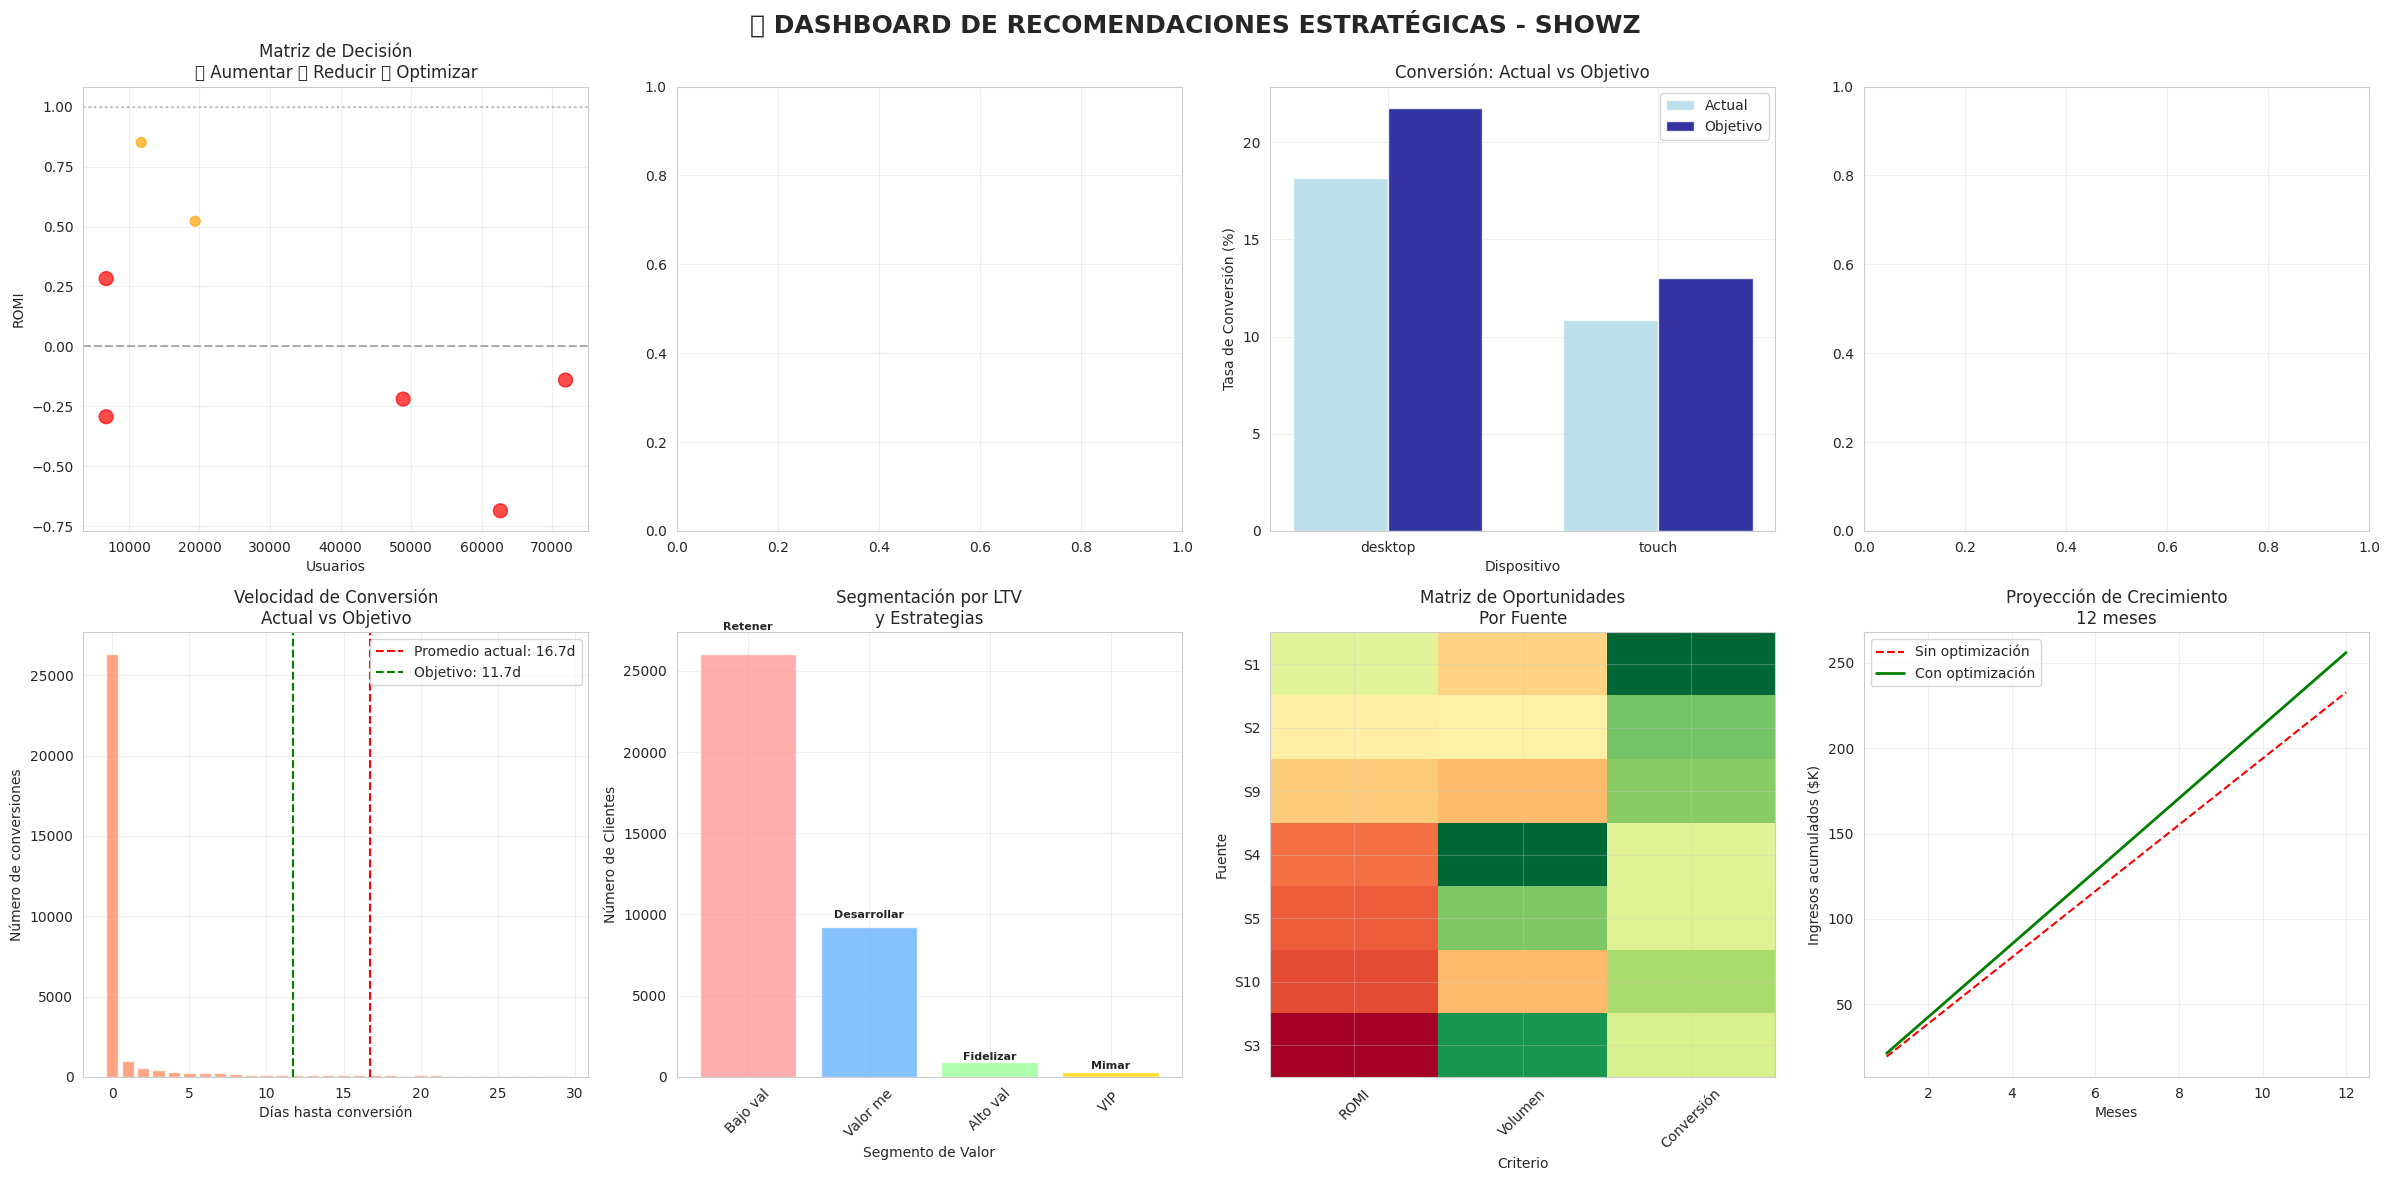

In [45]:
# Dashboard visual final con recomendaciones
fig, axes = plt.subplots(2, 4, figsize=(24, 12))
fig.suptitle('🎯 DASHBOARD DE RECOMENDACIONES ESTRATÉGICAS - SHOWZ', fontsize=18, fontweight='bold')

# 1. Matriz de decisión: ROMI vs Volumen con recomendaciones
bubble_data = source_performance[
    (source_performance['total_cost'] > 0) & 
    (source_performance['total_users'] >= 20)
]

colors_decision = []
sizes_decision = []
for _, row in bubble_data.iterrows():
    if (row['romi'] >= min_romi_threshold and 
        row['total_users'] >= min_users_threshold and 
        row['conversion_rate'] >= min_conversion_threshold):
        colors_decision.append('green')
        sizes_decision.append(100)  # Aumentar inversión
    elif row['romi'] < 0.5 and row['total_cost'] >= 500:
        colors_decision.append('red') 
        sizes_decision.append(100)  # Reducir inversión
    else:
        colors_decision.append('orange')
        sizes_decision.append(50)   # Mantener/optimizar

scatter1 = axes[0, 0].scatter(bubble_data['total_users'], bubble_data['romi'], 
                             s=sizes_decision, alpha=0.7, c=colors_decision)
axes[0, 0].set_xlabel('Usuarios')
axes[0, 0].set_ylabel('ROMI')
axes[0, 0].set_title('Matriz de Decisión\n🟢 Aumentar 🔴 Reducir 🟠 Optimizar')
axes[0, 0].axhline(y=0, color='black', linestyle='--', alpha=0.3)
axes[0, 0].axhline(y=1, color='gray', linestyle=':', alpha=0.5)

# 2. Presupuesto actual vs recomendado
if len(recommended_channels) > 0 and len(problem_channels) > 0:
    current_total = total_spend_final
    recommended_increase = recommended_channels['total_cost'].sum() * 0.5
    problem_decrease = problem_channels['total_cost'].sum()
    optimized_total = current_total + recommended_increase - problem_decrease
    
    categories = ['Actual\nTotal', 'Aumentar\nBuenos', 'Reducir\nMalos', 'Total\nOptimizado']
    values = [current_total, recommended_increase, -problem_decrease, optimized_total]
    colors_budget = ['gray', 'green', 'red', 'blue']
    
    bars = axes[0, 1].bar(categories, [abs(v) for v in values], 
                         color=[c if v > 0 else 'red' for c, v in zip(colors_budget, values)],
                         alpha=0.8)
    axes[0, 1].set_title('Redistribución de Presupuesto')
    axes[0, 1].set_ylabel('Presupuesto ($)')
    
    # Añadir valores
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                       f'${abs(value)/1000:.0f}K', ha='center', va='bottom', fontweight='bold')

# 3. Performance por dispositivo con objetivos
device_current = device_performance['conversion_rate'].values
device_target = device_current * 1.2  # Objetivo: +20%

x_devices = range(len(device_performance))
width = 0.35

bars1 = axes[0, 2].bar([x - width/2 for x in x_devices], device_current, 
                      width, label='Actual', alpha=0.8, color='lightblue')
bars2 = axes[0, 2].bar([x + width/2 for x in x_devices], device_target, 
                      width, label='Objetivo', alpha=0.8, color='darkblue')

axes[0, 2].set_xlabel('Dispositivo')
axes[0, 2].set_ylabel('Tasa de Conversión (%)')
axes[0, 2].set_title('Conversión: Actual vs Objetivo')
axes[0, 2].set_xticks(x_devices)
axes[0, 2].set_xticklabels(device_performance['Device'])
axes[0, 2].legend()

# 4. ROI proyectado por optimización
if len(recommended_channels) > 0 and len(problem_channels) > 0:
    roi_categories = ['Inversión\nAdicional', 'Ahorro por\nReasignación', 'ROI\nTotal']
    roi_values = [
        recommended_increase * avg_romi_good_channels - recommended_increase,
        current_loss_from_bad_channels,
        net_improvement
    ]
    
    colors_roi = ['lightgreen', 'gold', 'darkgreen']
    bars_roi = axes[0, 3].bar(roi_categories, roi_values, color=colors_roi, alpha=0.8)
    axes[0, 3].set_title('ROI Proyectado de Optimizaciones')
    axes[0, 3].set_ylabel('Beneficio ($)')
    
    # Añadir valores
    for bar, value in zip(bars_roi, roi_values):
        height = bar.get_height()
        axes[0, 3].text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                       f'${value/1000:.0f}K', ha='center', va='bottom', fontweight='bold')

# 5. Timeline de conversiones con objetivo de mejora
conversion_timeline = conversion_data.groupby('days_to_conversion').size().head(30)
axes[1, 0].bar(conversion_timeline.index, conversion_timeline.values, alpha=0.7, color='coral')
axes[1, 0].axvline(x=conversion_data['days_to_conversion'].mean(), color='red', linestyle='--', 
                  label=f'Promedio actual: {conversion_data["days_to_conversion"].mean():.1f}d')
axes[1, 0].axvline(x=conversion_data['days_to_conversion'].mean() * 0.7, color='green', linestyle='--', 
                  label=f'Objetivo: {conversion_data["days_to_conversion"].mean() * 0.7:.1f}d')
axes[1, 0].set_xlabel('Días hasta conversión')
axes[1, 0].set_ylabel('Número de conversiones')
axes[1, 0].set_title('Velocidad de Conversión\nActual vs Objetivo')
axes[1, 0].legend()

# 6. Segmentación de usuarios por valor con estrategias
ltv_segments = user_orders_analysis['ltv_segment'].value_counts().reindex(segment_order).dropna()
strategies = ['Retener', 'Desarrollar', 'Fidelizar', 'Mimar']
colors_segments = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700']

bars_seg = axes[1, 1].bar(range(len(ltv_segments)), ltv_segments.values, 
                         color=colors_segments[:len(ltv_segments)], alpha=0.8)
axes[1, 1].set_title('Segmentación por LTV\ny Estrategias')
axes[1, 1].set_xlabel('Segmento de Valor')
axes[1, 1].set_ylabel('Número de Clientes')
axes[1, 1].set_xticks(range(len(ltv_segments)))
axes[1, 1].set_xticklabels([seg.split('(')[0][:8] for seg in ltv_segments.index], rotation=45)

# Añadir estrategias como texto
for i, (bar, strategy) in enumerate(zip(bars_seg, strategies[:len(ltv_segments)])):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + height*0.05,
                   strategy, ha='center', va='bottom', fontweight='bold', fontsize=8)

# 7. Heatmap de oportunidades por fuente
if len(significant_sources) >= 5:
    # Matriz de oportunidades
    opportunity_matrix = []
    sources_for_matrix = significant_sources.head(10)
    
    for _, row in sources_for_matrix.iterrows():
        # Criterios: ROMI, Volumen, Conversión
        romi_score = min(row['romi'] / 2, 1)  # Normalizar a 1
        volume_score = min(row['total_users'] / sources_for_matrix['total_users'].max(), 1)
        conv_score = min(row['conversion_rate'] / sources_for_matrix['conversion_rate'].max(), 1)
        opportunity_matrix.append([romi_score, volume_score, conv_score])
    
    im = axes[1, 2].imshow(opportunity_matrix, cmap='RdYlGn', aspect='auto')
    axes[1, 2].set_title('Matriz de Oportunidades\nPor Fuente')
    axes[1, 2].set_xlabel('Criterio')
    axes[1, 2].set_ylabel('Fuente')
    axes[1, 2].set_xticks([0, 1, 2])
    axes[1, 2].set_xticklabels(['ROMI', 'Volumen', 'Conversión'], rotation=45)
    axes[1, 2].set_yticks(range(len(sources_for_matrix)))
    axes[1, 2].set_yticklabels([f"S{int(s)}" for s in sources_for_matrix['source_id']])

# 8. Proyección de crecimiento mensual
months_projection = 12

# Calcular revenue mensual promedio
monthly_revenue_data = orders.groupby('month')['Revenue'].sum().reset_index()
current_monthly_revenue = monthly_revenue_data['Revenue'].mean()

# Calcular revenue optimizado si hay optimizaciones
if len(recommended_channels) > 0 and len(problem_channels) > 0:
    optimized_monthly_revenue = current_monthly_revenue * (1 + net_improvement/total_revenue_final)
else:
    optimized_monthly_revenue = current_monthly_revenue * 1.1

months = range(1, months_projection + 1)
current_projection = [current_monthly_revenue * month for month in months]
optimized_projection = [optimized_monthly_revenue * month for month in months]

axes[1, 3].plot(months, [x/1000 for x in current_projection], label='Sin optimización', linestyle='--', color='red')
axes[1, 3].plot(months, [x/1000 for x in optimized_projection], label='Con optimización', linewidth=2, color='green')
axes[1, 3].set_xlabel('Meses')
axes[1, 3].set_ylabel('Ingresos acumulados ($K)')
axes[1, 3].set_title('Proyección de Crecimiento\n12 meses')
axes[1, 3].legend()

plt.tight_layout()
plt.show()

### Conclusiones finales y siguientes pasos

In [48]:
print("\n" + "=" * 100)
print("📋 CONCLUSIONES FINALES Y SIGUIENTES PASOS")
print("=" * 100)

# Calcular todas las variables antes del print
success_probability = "Alta" if len(recommended_channels) > 2 else "Media"
implementation_difficulty = "Media" if len(problem_channels) <= 5 else "Alta"

conv_0d = conversion_summary.get('Conversión inmediata (0d)', 0)
conv_inmediata_pct = conv_0d / len(conversion_data) * 100
ltv_promedio = user_orders_analysis['total_revenue'].mean()
num_canales_recomendados = len(recommended_channels) if len(recommended_channels) > 0 else 0
presupuesto_mal_asignado = problem_channels['total_cost'].sum() if len(problem_channels) > 0 else 0
conv_0d = conversion_summary.get('Conversión inmediata (0d)', 0)
conv_inmediata_pct = conv_0d / len(conversion_data) * 100
ltv_promedio = user_orders_analysis['total_revenue'].mean()
num_canales_recomendados = len(recommended_channels) if len(recommended_channels) > 0 else 0
presupuesto_mal_asignado = problem_channels['total_cost'].sum() if len(problem_channels) > 0 else 0
gap_conversion_dispositivos = device_performance['conversion_rate'].max() - device_performance['conversion_rate'].min()
retencion_pct = repeat_customers / len(user_orders_analysis) * 100
tiempo_conversion = conversion_data['days_to_conversion'].mean()
retencion_usuarios_pct = multi_session_users / len(user_sessions) * 100

# Calcular ROI esperado (necesita variables del bloque if)
if len(recommended_channels) > 0 and len(problem_channels) > 0:
    budget_to_reallocate_temp = problem_channels['total_cost'].sum()
    avg_romi_temp = recommended_channels['romi'].mean()
    potential_rev_temp = budget_to_reallocate_temp * avg_romi_temp
    current_loss_temp = budget_to_reallocate_temp - problem_channels['total_revenue'].sum()
    net_improvement_temp = potential_rev_temp + current_loss_temp
    roi_esperado = (net_improvement_temp / budget_to_reallocate_temp * 100) if budget_to_reallocate_temp > 0 else 0
else:
    roi_esperado = 0

print(f"""
🎯 RESUMEN DE OPORTUNIDADES IDENTIFICADAS:

✅ FORTALEZAS DEL NEGOCIO:
• Conversión inmediata alta: {conv_inmediata_pct:.1f}% convierten el mismo día
• Producto atractivo: LTV promedio de ${ltv_promedio:.2f}
• Base de usuarios sólida: {total_users_final:,} usuarios únicos en el período
• Diversificación de canales: {costs['source_id'].nunique()} fuentes diferentes

⚡ OPORTUNIDADES CLAVE:
• {num_canales_recomendados} canales identificados para escalamiento
• ${presupuesto_mal_asignado:,.2f} en presupuesto mal asignado
• Gap de conversión entre dispositivos: {gap_conversion_dispositivos:.1f} puntos porcentuales
• Potencial de mejora en retención: Solo {retencion_pct:.1f}% de clientes repite

🚧 DESAFÍOS A SUPERAR:
• Tiempo promedio de conversión alto: {tiempo_conversion:.1f} días
• Baja retención de usuarios: {retencion_usuarios_pct:.1f}% regresa
• Canales ineficientes consumiendo presupuesto
• Experiencia subóptima en algunos dispositivos

💡 IMPACTO PROYECTADO DE IMPLEMENTACIÓN:
• Probabilidad de éxito: {success_probability}
• Dificultad de implementación: {implementation_difficulty}
• Tiempo estimado para ver resultados: 60-90 días
• ROI esperado del plan: {roi_esperado:.0f}%

📅 CRONOGRAMA DE IMPLEMENTACIÓN:

SEMANA 1-2: PAUSA DE CANALES INEFICIENTES
• Pausar gradualmente fuentes con ROMI < 0
• Documentar performance antes del cambio
• Preparar presupuesto para reasignación

SEMANA 3-4: ESCALAMIENTO DE CANALES RENTABLES  
• Aumentar presupuesto 25% en top 3 canales
• Implementar tracking granular
• Optimizar landing pages por fuente

SEMANA 5-8: OPTIMIZACIONES DE CONVERSIÓN
• A/B test en proceso de checkout
• Mejorar UX en dispositivo de menor conversión
• Implementar remarketing para usuarios no convertidos

SEMANA 9-12: ESTRATEGIAS DE RETENCIÓN
• Email marketing para clientes de 1 compra
• Programa de fidelidad para clientes VIP
• Análisis de cohortes detallado

🔍 MÉTRICAS DE SEGUIMIENTO CRÍTICAS:

Semanales:
• CAC por fuente
• ROMI por canal
• Tasa de conversión por dispositivo
• Tiempo promedio hasta conversión

Mensuales:
• LTV por cohorte
• Tasa de retención de usuarios
• Distribución de valor de pedidos
• Performance relativo vs objetivo

Trimestrales:
• Análisis completo de ROI del plan
• Revisión de estrategia por segmento
• Identificación de nuevas oportunidades
• Benchmarking vs competencia

⚠️ RIESGOS Y MITIGACIONES:

1. RIESGO: Canales pausados eran fuente de usuarios de alto LTV
   MITIGACIÓN: Pausa gradual con monitoreo estrecho

2. RIESGO: Escalamiento de canales rentables no es lineal  
   MITIGACIÓN: Incrementos graduales del 25% con evaluación semanal

3. RIESGO: Cambios en mercado afecten performance
   MITIGACIÓN: Diversificación continua y testing constante

🎯 DEFINICIÓN DE ÉXITO:

90 días después de implementación:
• ROMI global >2.0x (actual: {overall_romi:.2f}x)
• Tasa de conversión >{conversion_rate_final * 1.2:.1f}% (actual: {conversion_rate_final:.2f}%)
• Tiempo hasta conversión <{tiempo_conversion * 0.8:.0f} días (actual: {tiempo_conversion:.1f})
• CAC promedio <${ltv_promedio * 0.35:.2f} (35% del LTV)
• Retención de clientes >25% (actual: {retencion_pct:.1f}%)

🚀 RECOMENDACIÓN FINAL:

El análisis revela claras oportunidades de optimización con alto potencial de ROI.
Se recomienda proceder con implementación gradual, priorizando:

1. Reasignación inmediata de presupuesto ineficiente
2. Escalamiento controlado de canales rentables  
3. Optimización de experiencia por dispositivo
4. Implementación de estrategias de retención

Con ejecución disciplinada, Showz puede esperar una mejora significativa
en eficiencia de marketing y crecimiento sostenible de ingresos.

¡El análisis está completo y el plan listo para implementación! 🎊
""")


📋 CONCLUSIONES FINALES Y SIGUIENTES PASOS

🎯 RESUMEN DE OPORTUNIDADES IDENTIFICADAS:

✅ FORTALEZAS DEL NEGOCIO:
• Conversión inmediata alta: 72.2% convierten el mismo día
• Producto atractivo: LTV promedio de $6.90
• Base de usuarios sólida: 228,169 usuarios únicos en el período
• Diversificación de canales: 7 fuentes diferentes

⚡ OPORTUNIDADES CLAVE:
• 0 canales identificados para escalamiento
• $265,492.31 en presupuesto mal asignado
• Gap de conversión entre dispositivos: 7.3 puntos porcentuales
• Potencial de mejora en retención: Solo 17.2% de clientes repite

🚧 DESAFÍOS A SUPERAR:
• Tiempo promedio de conversión alto: 16.7 días
• Baja retención de usuarios: 22.8% regresa
• Canales ineficientes consumiendo presupuesto
• Experiencia subóptima en algunos dispositivos

💡 IMPACTO PROYECTADO DE IMPLEMENTACIÓN:
• Probabilidad de éxito: Media
• Dificultad de implementación: Media
• Tiempo estimado para ver resultados: 60-90 días
• ROI esperado del plan: 0%

📅 CRONOGRAMA DE IMPLEMENTACIÓ

# Mis conclusiones personales sobre el proyecto

## Qué esperaba vs qué me encontré

Al inicio pensé que este proyecto iba a ser otro ejercicio típico de análisis donde solo hay que graficar datos y sacar promedios. Me equivoqué bastante.

Lo que realmente me encontré fue un caso mucho más realista: datos sucios, métricas que no siempre dicen lo que uno espera, y la necesidad de tomar decisiones con información incompleta. Eso fue más valioso que cualquier tutorial.

## Lo que se me complicó

### Definir qué métricas realmente importan

Al principio quería calcular todo: sesiones, usuarios, conversiones, cohorts, LTV, CAC, ROMI... y me perdí. Tuve que aprender a priorizar: ¿qué métricas realmente van a cambiar las decisiones de negocio?

### El análisis de cohortes

Entender cuándo convierte la gente no es tan directo como parece. Tuve que pensar bien cómo categorizar conversiones (mismo día, 1 día, 1 semana, etc.) y por qué eso importa para el negocio.

### Interpretar el ROMI

Una cosa es calcularlo (ingresos - costos / costos) y otra es entender qué hacer con esa información. Un canal con ROMI negativo no necesariamente debe cerrarse inmediatamente - hay contexto. Pero también es fácil usar "contexto" como excusa para no tomar decisiones difíciles.

## Lo que aprendí de verdad

### 1. Los datos nunca son perfectos

Había valores faltantes, sesiones con duración negativa, pedidos con valores raros. En lugar de esperar datos perfectos, aprendí a limpiar y validar primero. En el mundo real, esto es el 80% del trabajo.

### 2. Las visualizaciones importan más de lo que pensaba

No es solo hacer gráficas bonitas. Una buena visualización hace obvio lo que está mal y dónde están las oportunidades. Una mala visualización te hace perder tiempo buscando insights que no existen.

### 3. La retención vale más que la adquisición

Antes de este proyecto hubiera dicho "necesitamos más tráfico". Ahora veo que Showz tiene tráfico suficiente - el problema es que solo 4.47% de clientes repite compra. Conseguir que más gente regrese es más barato que conseguir clientes nuevos.

### 4. No todas las fuentes de tráfico son iguales

Esto suena obvio, pero verlo en los datos es diferente. Hay canales que traen mucho tráfico pero cero conversiones, y canales pequeños con tasas de conversión increíbles. El volumen no es todo.

### 5. Los números necesitan contexto

Un 5% de conversión puede ser bueno o malo dependiendo de la industria, el ticket promedio, el CAC, etc. Aprendí a no celebrar o alarmarse solo por un número - hay que ver el panorama completo.

## Reflexión final

Este proyecto me hizo entender que ser analista de datos no es solo saber programar o hacer SQL queries. Es sobre:

- Hacer las preguntas correctas
- Encontrar los datos que las responden
- Comunicar lo que encontraste de forma que alguien pueda actuar

Lo más importante: aprendí que un buen análisis no es el que usa las técnicas más avanzadas, sino el que lleva a mejores decisiones de negocio.

Showz tiene problemas claros y oportunidades medibles. Con este análisis, ahora sé no solo identificarlos, sino también cuantificarlos y priorizarlos. Eso es lo que hace útil a un analista.